<font color='red'>TOTAL: 86/100</font>
<br>
<font color='green'>COMMENT: For the question-specific feedback and marks, see below.</font>


# Introductory applied machine learning (INFR10069)

# Assignment 3: Object recognition

## Marking Breakdown

**70-100%** results/answer correct plus extra achievement at understanding or analysis of results. Clear explanations, evidence of creative or deeper thought will contribute to a higher grade.

**60-69%** results/answer correct or nearly correct and well explained.

**50-59%** results/answer in right direction but significant errors.

**40-49%** some evidence that the student has gained some understanding, but not answered the questions
properly.

**0-39%** serious error or slack work.

## Mechanics

Fill out this notebook, save it, and submit it **and a `.txt` file** (see Part 2) in answer to this assignment.
**You need to submit these two files electronically as described below.**

On a DICE environment, open the terminal, navigate to the location of this notebook, and submit this notebook file using the following command:

`submit iaml cw2 07_Assignment_3.ipynb assignment_3_predictions.txt`

What actually happens in the background is that your file is placed in a folder available to markers. If you submit a file with the same name into the same location, **it will *overwrite* your previous submission**. You can check the status of your submissions with the `show_submissions` command.

**Distance Learners:** To copy your work up to DICE (such that you can use the `submit` command) you can use `scp` or `rsync` (you may need to install these yourself). You can copy files up using `student.ssh.inf.ed.ac.uk`, then ssh in to submit, e.g. (in a unix terminal):
```
filename1=07_Assignment_3.ipynb
local_scp_filepath1=~/git/iaml2017/${filename1}
filename2=assignment_3_predictions.txt
local_scp_filepath2=~/git/iaml2017/${filename2}
UUN=s0816700
server_address=student.ssh.inf.ed.ac.uk
scp -r ${local_scp_filepath1} ${UUN}@${server_address}:${filename1}
scp -r ${local_scp_filepath2} ${UUN}@${server_address}:${filename2}
# rsync -rl ${local_scp_filepath1} ${UUN}@${server_address}:${filename1}
# rsync -rl ${local_scp_filepath2} ${UUN}@${server_address}:${filename2}
ssh ${UUN}@${server_address}
ssh student.login
submit iaml cw2 07_Assignment_3.ipynb assignment_3_predictions.txt
```

**Late submissions:** The policy stated in the School of Informatics MSc Degree Guide is that normally you will not be allowed to submit coursework late. See http://www.inf.ed.ac.uk/teaching/years/msc/courseguide10.html#exam for exceptions to this, e.g. in case of serious medical illness or serious personal problems.

**Collaboration:** You may discuss the assignment with your colleagues, provided that the writing that you submit is entirely your own. That is, you should NOT borrow actual text or code from other students. We ask that you provide a list of the people who you've had discussions with (if any).

**Resubmission:** If you submit your file again, the previous submission is **overwritten**. We will mark the version that is in the submission folder at the deadline.

## Important Instructions

1. You *MUST* have your environment set up as in the [README](https://github.com/JamesOwers/iaml2017) and you *must activate this environment before running this notebook*:
```
source activate iaml
cd iaml_2017
jupyter notebook
# Navigate to this file
```

1. Wherever you are required to produce code you should use code cells, otherwise you should use markdown cells to report results and explain answers.

1. The .csv files that you will be using are located at `./datasets` (the `datasets` directory is adjacent to this file).

1. **IMPORTANT:** Keep your answers brief and concise. Most written questions can be answered with 2-3 lines of explanation.

## Imports

Include all required imports and execute the cell below. It's typical to include package imports at the top of the file for clarity.

In [103]:
from __future__ import print_function, division
%matplotlib inline
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, KFold, cross_val_predict
import math
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import accuracy_score, log_loss

## Description of the dataset
In this assignment our goal is to recognize objects in images of realistic scenes. There are 19 different classes of object e.g. person, dog, cat, car, etc. The dataset derives from several thousands photographs harvested from the web. Each object of a relevant class has been manually annotated with a bounding box. Images can contain none, one or multiple objects of each class. We have prepared a [website](http://www.inf.ed.ac.uk/teaching/courses/iaml/2014/assts/asst3/images.html) where you can view the images.

We are going to detect whether images contain a person or not - a binary classification problem. To save you time and to make the problem manageable with limited computational resources, we have preprocessed the dataset. We will use the [Bag of Visual Words](https://en.wikipedia.org/wiki/Bag-of-words_model_in_computer_vision) representation. Each column of the dataset (which is not an lable), refers to a 'visual word'. Each image is represented by a 500 dimensional vector that contains the normalized count for each of 500 different visual words present in the respective image (a similar representation is used for the spambase dataset, just for real words). See the Appendix at the bottom of the notebook for more information. The image data is thus a $N \times 500$ dimensional matrix where `N` is the number of images.

The full dataset has 520 attributes (dimensions). The first attribute (`imgID`) contains the image ID which allows you to associate a data point with an actual image. The next 500 attributes (`dim1`, ..., `dim500`) are a normalized count vector for each visual word. The last 19 attributes (`is_class`) are the labels - 1 means the class is present in the image. In most of the experiments (unless explicitly noted otherwise) you will only need the `is_person` attribute and the 500 dimensional feature vector. **Do not use the additional class indicator attributes as features** unless explicitly told to do so. 

In Part A we provide you with a training (`train_images partA.csv`) and a validation (`valid_images partA .csv`) dataset. In Part B we provide three data sets: a training set (`train_images partB.csv`), a validation set (`valid_images partB.csv`), and a test set (`test_images partB.csv`). The training and validation set contain valid labels. In the test set the labels are missing. The files are available from the GitHub repository. 

**Important**: *Throughout the assignment you will be given various versions of the dataset that are relevant
to a particular question. Please be careful to use the correct version of the dataset when instructed to do so.
If you use the wrong version of the dataset by mistake no marks will be awarded.*

## 1. Exploration of the dataset [70%]

### ========== Question 1.1 --- [1 mark] ==========
Create two Pandas DataFrame objects called `train_A` and `valid_A` by loading the datasets `train_images_partA.csv` and `valid_images_partA.csv`. Display the number of data points and attributes in each of the two datasets.

<font color='red'>TOTAL: 1</font>
<br>
<font color='green'>COMMENT: -</font>

In [104]:
data_path1=os.path.join(os.getcwd(), 'datasets', 'train_images_partA.csv')
train_A=pd.read_csv(data_path1, delimiter = ',')
data_path1=os.path.join(os.getcwd(), 'datasets', 'valid_images_partA.csv')
valid_A=pd.read_csv(data_path1, delimiter = ',')
print('Number of data points and: {}, number of attributes: {} in trainA'.format(train_A.shape[0], train_A.shape[1]))
print('Number of data points and: {}, number of attributes: {} in validA'.format(valid_A.shape[0], valid_A.shape[1]))

Number of data points and: 2093, number of attributes: 520 in trainA
Number of data points and: 1113, number of attributes: 520 in validA


### ========== Question 1.2 --- [1 mark] ==========
Display and inspect the first 10 instances in the training dataset.

<font color='red'>TOTAL: 1</font>
<br>
<font color='green'>COMMENT: -</font>

In [105]:
train_A.head(10)

,imgId,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,...,is_cow,is_diningtable,is_dog,is_horse,is_motorbike,is_person,is_pottedplant,is_sheep,is_sofa,is_tvmonitor
0,2008_000008,0.002232,0.000558,0.002790,0.000837,0.001674,0.001953,0.001395,0.002232,0.003627,...,0,0,0,1,0,1,0,0,0,0
1,2008_000015,0.001563,0.000391,0.007422,0.003516,0.003906,0.005078,0.001953,0.002344,0.001953,...,0,0,0,0,0,0,0,0,0,0
2,2008_000019,0.000521,0.000000,0.000000,0.001042,0.001563,0.005729,0.000521,0.002083,0.003646,...,0,0,1,0,0,0,0,0,0,0
3,2008_000023,0.002976,0.002232,0.004464,0.000372,0.000372,0.002232,0.000000,0.003720,0.000000,...,0,0,0,0,0,1,0,0,0,1
4,2008_000028,0.001359,0.000340,0.001359,0.000340,0.001359,0.002038,0.002378,0.000000,0.003397,...,0,0,0,0,0,0,0,0,0,0
5,2008_000033,0.000000,0.006324,0.000372,0.000372,0.000372,0.000372,0.000744,0.008185,0.000372,...,0,0,0,0,0,0,0,0,0,0
6,2008_000036,0.000340,0.000000,0.004416,0.000340,0.000679,0.006114,0.001359,0.002717,0.003057,...,0,0,0,0,0,1,0,0,0,0
7,2008_000037,0.000837,0.002232,0.000279,0.000279,0.000837,0.000000,0.000279,0.006696,0.000000,...,0,0,0,0,0,0,0,0,0,0
8,2008_000041,0.002378,0.001359,0.004755,0.001019,0.003736,0.001359,0.001019,0.004076,0.003397,...,0,1,0,0,0,1,0,0,0,0
9,2008_000045,0.001019,0.000340,0.006454,0.001698,0.001359,0.003736,0.000000,0.004076,0.000000,...,0,0,0,0,0,0,0,0,0,0


### ========== Question 1.3 --- [1 mark] ==========
Select the attributes (i.e. input features) for training our classifiers. These should be the visual word normalised counts `dim1, dim2, ..., dim500`. Create a list of the **names** of the attributes of interest. 

<font color='red'>TOTAL: 1</font>
<br>
<font color='green'>COMMENT: -</font>

In [106]:
atrib_list=train_A.columns[1:501].tolist()
print(atrib_list)

['dim1', 'dim2', 'dim3', 'dim4', 'dim5', 'dim6', 'dim7', 'dim8', 'dim9', 'dim10', 'dim11', 'dim12', 'dim13', 'dim14', 'dim15', 'dim16', 'dim17', 'dim18', 'dim19', 'dim20', 'dim21', 'dim22', 'dim23', 'dim24', 'dim25', 'dim26', 'dim27', 'dim28', 'dim29', 'dim30', 'dim31', 'dim32', 'dim33', 'dim34', 'dim35', 'dim36', 'dim37', 'dim38', 'dim39', 'dim40', 'dim41', 'dim42', 'dim43', 'dim44', 'dim45', 'dim46', 'dim47', 'dim48', 'dim49', 'dim50', 'dim51', 'dim52', 'dim53', 'dim54', 'dim55', 'dim56', 'dim57', 'dim58', 'dim59', 'dim60', 'dim61', 'dim62', 'dim63', 'dim64', 'dim65', 'dim66', 'dim67', 'dim68', 'dim69', 'dim70', 'dim71', 'dim72', 'dim73', 'dim74', 'dim75', 'dim76', 'dim77', 'dim78', 'dim79', 'dim80', 'dim81', 'dim82', 'dim83', 'dim84', 'dim85', 'dim86', 'dim87', 'dim88', 'dim89', 'dim90', 'dim91', 'dim92', 'dim93', 'dim94', 'dim95', 'dim96', 'dim97', 'dim98', 'dim99', 'dim100', 'dim101', 'dim102', 'dim103', 'dim104', 'dim105', 'dim106', 'dim107', 'dim108', 'dim109', 'dim110', 'dim111

### ========== Question 1.4 --- [1 mark] ==========
By using the list from Question 1.3 now create 4 numpy arrays `X_tr`, `X_val`, `y_tr` and `y_val` in which to store the training features, validation features, training targets, and validation targets, respectively. Your target vectors should correspond to the `is_person` attribute of the training and validation sets. Display the dimensionalities (i.e shapes) of the 4 arrays. 

Check this carefully - you will be penalised in following questions if the data is not correct!

<font color='red'>TOTAL: 1</font>
<br>
<font color='green'>COMMENT: -</font>

In [107]:
X_tr=train_A[atrib_list].values
X_val=valid_A[atrib_list].values
y_tr=train_A["is_person"].values
y_val=valid_A["is_person"].values
print('X_train shape: {}'.format(X_tr.shape))
print('y_train shape: {}'.format(y_tr.shape))
print('X_validation shape: {}'.format(X_val.shape))
print('y_validation shape: {}'.format(y_val.shape))

X_train shape: (2093, 500)
y_train shape: (2093,)
X_validation shape: (1113, 500)
y_validation shape: (1113,)


### ========== Question 1.5 --- [2 marks] ==========
Create a [countplots](https://seaborn.github.io/generated/seaborn.countplot.html?highlight=countplot#seaborn.countplot) for the training and validation targets. Create a single figure, and put the two plots inside the single figure. Label axes appropriately and add a title to your plot. Use descriptive `xticklabels` instead of the default numeric ones.

<font color='red'>TOTAL: 2</font>
<br>
<font color='green'>COMMENT: -</font>

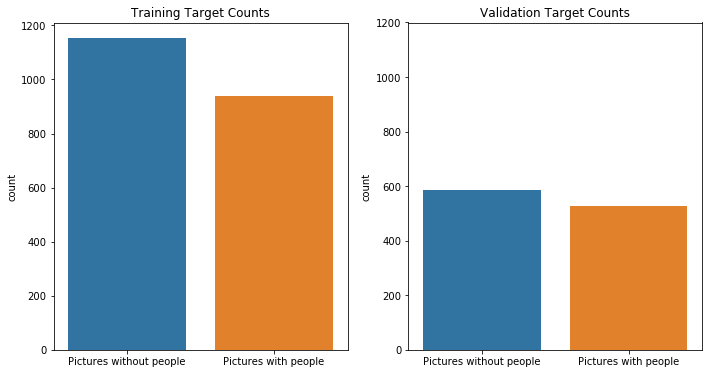

In [108]:
plt.subplots(1, figsize=(10,10))
plt.subplot(2,2,1)
ax=sns.countplot(x=y_tr)
ax.set_title("Training Target Counts")
ax.set_xticklabels(["Pictures without people", "Pictures with people"])
ax.set_xlabel("")
plt.subplot(2,2,2)
ax1=sns.countplot(x=y_val)
ax1.set_ylim([0, 1200])
ax1.set_title("Validation Target Counts")
ax1.set_xticklabels(["Pictures without people", "Pictures with people"])
ax1.set_xlabel("")
plt.tight_layout()
plt.show()

### ========== Question 1.6 --- [1 mark] ==========
We want to make a baseline classification accuracy to beat. Pick a baseline "dummy" classifier, describe in a sentence why you chose it, and report the accuracy it achieves on the validation set?

<font color='red'>TOTAL: 1</font>
<br>
<font color='green'>COMMENT: -</font>

It is more likely that a given image does not contain a person. So as a baseline classifier we predict that the image does not contain a person every time. It is a dummy classifier which is based on the prior probability.


In [109]:
y_val_zero=pd.Series(0, index=np.arange(len(y_val)))
baseline=accuracy_score(y_val, y_val_zero)
print("Baseline Classification Accuracy Score: ", np.round(baseline, decimals=4))

Baseline Classification Accuracy Score:  0.5265


### ========== Question 1.7 --- [3 marks] ==========
Train a [`LogisticRegression`](http://scikit-learn.org/0.17/modules/generated/sklearn.linear_model.LogisticRegression.html) classifier using default settings, except for the `solver` parameter which you should set to `lbfgs`. Report the classification accuracy score on the training and validation sets and compare with the baseline. Comment on the results with 1-2 sentences. You may include any additional plot(s) if you wish to justify your explanation.

<font color='red'>TOTAL: 3</font>
<br>
<font color='green'>COMMENT: -</font>

In [110]:
lr=LogisticRegression(solver='lbfgs')
lr.fit(X_tr, y_tr)
print("Logistic Regression score on training set: ", np.round(lr.score(X_tr, y_tr), decimals=4))
print("Logistic Regression score on validation set: ", np.round(lr.score(X_val, y_val), decimals=4))
print(np.all(lr.predict(X_val)==0))
print(np.all(lr.predict(X_tr)==0))

Logistic Regression score on training set:  0.5509
Logistic Regression score on validation set:  0.5265
True
True


The logisitic regression classifier does a poor job because the classification accuracy for the baseline classifier is .527, and for the logisitic regression classifier it's .55 for the training set and .527 for the validation set. The logistic regression classifier is just as effective as predicting an image does not contain a person for all images.

### ========== Question 1.8 --- [1 mark] ==========
Display the means and standard deviations of the first 5 features in the training set. *Hint: you want to compute the means and standard deviations for each column in your arrays. Make sure you make appropriate use of the `axis` parameter.*

<font color='red'>TOTAL: 1</font>
<br>
<font color='green'>COMMENT: -</font>

In [111]:
print("Mean of first five features:")
for i in range(1,6):
    print("Mean of feature dim"+str(i)+": "+str(np.round(X_tr[:,i-1].mean(), decimals=4)))
    print("Standard deviation of feature dim"+str(i)+": "+str(np.round(X_tr[:,i-1].std(), decimals=4)))

Mean of first five features:
Mean of feature dim1: 0.0018
Standard deviation of feature dim1: 0.0012
Mean of feature dim2: 0.0008
Standard deviation of feature dim2: 0.0014
Mean of feature dim3: 0.0043
Standard deviation of feature dim3: 0.0037
Mean of feature dim4: 0.0019
Standard deviation of feature dim4: 0.0013
Mean of feature dim5: 0.0023
Standard deviation of feature dim5: 0.0016


### ========== Question 1.9 --- [3 marks] ==========
Feature standardisation is a pre-processing technique used to transform data so that they have zero mean and unit standard deviation. For many algorithms, this is a very important step for training models (both regression and classification). Read about [feature standardisation](http://scikit-learn.org/0.17/modules/preprocessing.html) and make sure you understand what kind of transformation this method applies to the data.

`Scikit-learn` offers a [class](http://scikit-learn.org/0.17/modules/generated/sklearn.preprocessing.StandardScaler.html) for feature standardisation. Instansiate a StandardScaler object and fit it using the **training features**. Use this fitted object to transform both your training and validation features to have a standard scale. 

Once your training and validation input data have been transformed, display the means and standard deviations of the first 5 attributes for **both** the training and validation sets. Are the results as you expected? Explain your answer in 2-3 sentences. Why didn't we use the validation set to standardise the data?

**IMPORTANT: You should use the transformed data for the rest of this part.**

<font color='red'>TOTAL: 3</font>
<br>
<font color='green'>COMMENT: -</font>

In [112]:
scaler=preprocessing.StandardScaler().fit(X_tr)
X_tr=scaler.transform(X_tr)
X_val=scaler.transform(X_val)
print("Mean of first five features in training set:")
for i in range(1,6):
    print("Mean of feature dim"+str(i)+": "+str(np.round(X_tr[:,i-1].mean(), decimals=4)))
    print("Standard deviation of feature dim"+str(i)+": "+str(np.round(X_tr[:,i-1].std(), decimals=4)))
print("\nMean of first five features in validation set:")
for i in range(1,6):
    print("Mean of feature dim"+str(i)+": "+str(np.round(X_val[:,i-1].mean(), decimals=4)))
    print("Standard deviation of feature dim"+str(i)+": "+str(np.round(X_val[:,i-1].std(), decimals=4)))

Mean of first five features in training set:
Mean of feature dim1: -0.0
Standard deviation of feature dim1: 1.0
Mean of feature dim2: -0.0
Standard deviation of feature dim2: 1.0
Mean of feature dim3: 0.0
Standard deviation of feature dim3: 1.0
Mean of feature dim4: 0.0
Standard deviation of feature dim4: 1.0
Mean of feature dim5: -0.0
Standard deviation of feature dim5: 1.0

Mean of first five features in validation set:
Mean of feature dim1: -0.0055
Standard deviation of feature dim1: 1.0131
Mean of feature dim2: -0.0383
Standard deviation of feature dim2: 0.9698
Mean of feature dim3: 0.1092
Standard deviation of feature dim3: 1.0492
Mean of feature dim4: 0.0937
Standard deviation of feature dim4: 1.0568
Mean of feature dim5: 0.0306
Standard deviation of feature dim5: 0.9747


The Standard Scalar standardizes features by removing the mean and scaling to unit variance. This means that the mean will become 0 and standard deviation will become 1, which is the case with the training set results above. The mean and standard deviation is different for the validation set because we did not use the StandardScaler to fit the validation set, only the training set, so unless the validation data set shows exactly the same trends we won't get mean of 0 and standard deviation of 1.


### ========== Question 1.10 --- [3 marks] ==========
By using the transformed input data, train a new `LogisticRegression` classifier. Again, set the `solver` parameter to `lbfgs` and use default settings for the other parameters. Report the classification accuracy on both the training and validation sets.

Comment on how your model compares to the baseline classifier from Question 1.6? You may use additional plot(s) to support your explanation.

<font color='red'>TOTAL: 3</font>
<br>
<font color='green'>COMMENT: -</font>

In [113]:
lr_new=LogisticRegression(solver='lbfgs')
lr_new.fit(X_tr, y_tr)
print("Logistic Regression score on training data: ", np.round(lr_new.score(X_tr, y_tr), decimals=4))
print("Logistic Regression score on validation data: ", np.round(lr_new.score(X_val, y_val), decimals=4))

Logistic Regression score on training data:  0.8108
Logistic Regression score on validation data:  0.6433


With the transformed data, the logistic regression classifier performs significantly better than the baseline classifier. The model performs better on the training set than on the validation set. This is expected because the the training data is used to fit the data, as such the classifier is more sensitive to the training data than validation data.

### ========== Question 1.11 --- [1 mark] ==========
So far we have used default settings for training the logistic regression classifier. Now, we want to use [K-fold cross-validation](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) to optimise the regularisation parameter `C`. The regularisation parameter controls the degree to which we wish to penalise large magnitudes in the weight vector. This can help us prevent overfitting but, if set too high, could lead us to underfit too.

Create a 3-fold cross-validation object. Set the `shuffle` parameter to `True` and the `random_state` to `0`. By using the cross-validation iterator, display the number of test samples for each fold.

<font color='red'>TOTAL: 1</font>
<br>
<font color='green'>COMMENT: -</font>

In [114]:
cross=KFold(n_splits=3, shuffle=True, random_state=0)
split=cross.split(X_tr)
count=1
for i,j in split:
    print("Number of test samples in fold ",count, " = ", len(j) )
    count=count+1

Number of test samples in fold  1  =  698
Number of test samples in fold  2  =  698
Number of test samples in fold  3  =  697


### ========== Question 1.12 --- [2 marks] ========== 
Using the cross-validation iterator from the previous question, perform a search for the best value for `C`. 

We are going to loop over each CV fold, and each value of `C`. The values of `C` to search should be 20 equally-spaced values **in log space** ranging from `1e-5` to `1e5` *(hint: look at the `logspace()` function in numpy)*. 

Create a 2-dimensional array and, for each cross-validation fold and parameter setting pair, compute and store the classification accuracy score e.g. store the score of fold 0 with parameter setting 1 at score_array[0,1]. As previously, set the `solver` parameter to `lbfgs` and use default settings for the other parameters (except for `C` obviously!).

*(hint: you could use two loops in your code; one iterating over CV folds and another one iterating over the values for `C`)*. 

<font color='red'>TOTAL: 2</font>
<br>
<font color='green'>COMMENT: -</font>

In [115]:
score_array=[[],[],[]]
count=0
split=cross.split(X_tr)
for i, j in split:
    x_train_new, x_val_new = X_tr[i], X_tr[j]
    y_train_new, y_val_new = y_tr[i], y_tr[j]
    for para in np.logspace(-5, 5, 20):
        lr_cross=LogisticRegression(solver='lbfgs', C=para)
        lr_cross.fit(x_train_new, y_train_new)
        score_array[count].append(lr_cross.score(x_val_new, y_val_new))
    count=count+1
score_array   

[[0.57306590257879653,
  0.62893982808022919,
  0.66762177650429799,
  0.67191977077363896,
  0.68767908309455583,
  0.69627507163323787,
  0.67478510028653294,
  0.67048710601719197,
  0.65329512893982811,
  0.65902578796561606,
  0.65902578796561606,
  0.65329512893982811,
  0.64899713467048714,
  0.64613180515759316,
  0.64613180515759316,
  0.64899713467048714,
  0.64613180515759316,
  0.64613180515759316,
  0.64899713467048714,
  0.64899713467048714],
 [0.54584527220630374,
  0.63180515759312317,
  0.69484240687679089,
  0.71919770773638969,
  0.72922636103151861,
  0.73495702005730656,
  0.70200573065902583,
  0.67478510028653294,
  0.6547277936962751,
  0.63610315186246413,
  0.63180515759312317,
  0.63323782234957016,
  0.62607449856733521,
  0.6275071633237822,
  0.6275071633237822,
  0.62607449856733521,
  0.62607449856733521,
  0.62607449856733521,
  0.6275071633237822,
  0.62607449856733521],
 [0.54806312769010046,
  0.63558106169296991,
  0.642754662840746,
  0.65566714490

### ========== Question 1.13 --- [1 mark] ========== 
Plot the mean classification performance (across CV folds) of the logistic regression classifier against the regularisation parameter `C` by using the range from Question 1.12. Use a logarithmic scale for the x-axis and label both axes appropriately. 

<font color='red'>TOTAL: 1</font>
<br>
<font color='green'>COMMENT: -</font>

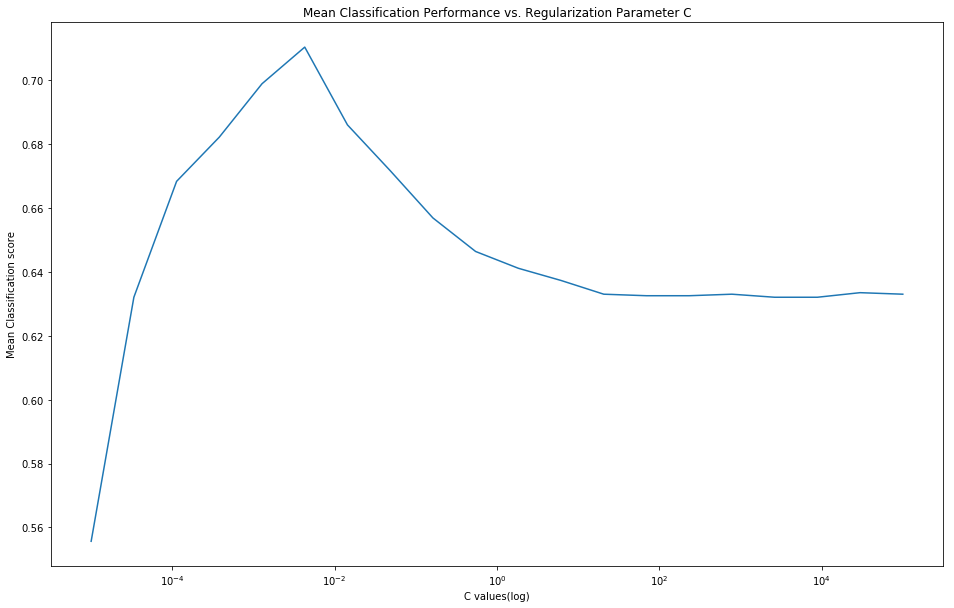

In [116]:
plt.figure(figsize=(16, 10))
plt.plot(np.logspace(-5,5,20), np.mean(score_array, axis=0))
plt.title('Mean Classification Performance vs. Regularization Parameter C')
plt.ylabel("Mean Classification score")
plt.xscale("log")
plt.xlabel("C values(log)")
plt.show()

### ========== Question 1.14 --- [2 marks] ==========
Display the optimal value for the regularisation parameter `C` determined by the search results from Question 1.12. Similarly to Question 1.13, consider the mean classifiation accuracy across CV folds. By using the optimal value (i.e. the one that yields the highest average classification accuracy) train a new `LogisticRegression` classifier and report the classification accuracy on the validation set. *(Hint: Do not pick the optimal value "by hand", instead use an appropriate numpy function).*

<font color='red'>TOTAL: 2</font>
<br>
<font color='green'>COMMENT: -</font>

In [117]:
Cideal=np.logspace(-5,5,20)[np.mean(score_array, axis=0).argmax()]
print("Optimal value for regularisation parameter C = ", np.round(Cideal, decimals=4))
lr_optimal=LogisticRegression(solver='lbfgs',C=Cideal)
lr_optimal.fit(X_tr, y_tr)
print("Classification Accuracy with ideal C =", np.round(lr_optimal.score(X_val, y_val), decimals=4))

Optimal value for regularisation parameter C =  0.0043
Classification Accuracy with ideal C = 0.6963


### ========== Question 1.15 --- [1 mark] ========== 
Scikit-learn offers a [`LogisticRegressionCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.linear_model.LogisticRegressionCV.html) module which implements Logistic Regression with builtin cross-validation to find out the optimal `C` parameter. You can specify the range for the `C` parameter, as well as the cross-validation method you want to use with the `Cs` and `cv` parameters, respectively. Use the `C` range you set up in Question 1.12 and the 3-fold cross-validation iterator from Question 1.11. Once again, train the models by using the `lbfgs` optimisation method and display the optimal value for the parameter `C`. Finally, display the classification accuracy on the validation set. Check your results are consistent with those from Question 1.14!

<font color='red'>TOTAL: 1</font>
<br>
<font color='green'>COMMENT: -</font>

In [118]:
lrcv=LogisticRegressionCV(Cs=np.logspace(-5, 5, 20), cv=cross, solver='lbfgs')
lrcv.fit(X_tr, y_tr)
Cideal=lrcv.C_[0]
print("Optimal value for regularisation parameter C = ", np.round(Cideal, decimals=4))
print("Classification Accuracy with ideal C =", np.round(lrcv.score(X_val, y_val), decimals=4))

Optimal value for regularisation parameter C =  0.0043
Classification Accuracy with ideal C = 0.6963


### ========== Question 1.16 --- [1 mark] ==========
Now, we want to validate the importance of various features for classification. For this purpose, we will use a [`RandomForestClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) (you might want to refer to the labs if you are unsure how we can estimate feature importances with decision tree and random forest models).

Initialise a random forest classifier and fit the model by using training data only and 500 trees (i.e. `n_estimators`). Set the `RandomState` equal to 42 to ensure reproducible results. Report the accuracy score on both the training and validation sets.

<font color='red'>TOTAL: 1</font>
<br>
<font color='green'>COMMENT: -</font>

In [119]:
rf=RandomForestClassifier(n_estimators = 500, random_state=42).fit(X=X_tr, y=y_tr)
print('Classification Accuracy on training data: ', np.round(rf.score(X_tr,y_tr), decimals=4))
print('Classification Accuracy on validation data: ', np.round(rf.score(X_val,y_val), decimals=4))

Classification Accuracy on training data:  1.0
Classification Accuracy on validation data:  0.6927


### ========== Question 1.17 --- [2 marks] ==========
Comment on the results above. Do you find the discrepancy between training and validation accuracies surprising?

<font color='red'>TOTAL: 2</font>
<br>
<font color='green'>COMMENT: -</font>

The results are not surprising. A very high accuracy score, 100% in this case is normal for an unbounded depth Random Forest Classifier. It is overfitted to the training data and will always predict the training data correctly because of the depth. The model performed significantly worse on the validation set which is expected becuase it is essentially overfitted to the training data.

### ========== Question 1.18 --- [2 marks] ==========
By using the random forest model from the previous question order the features by descending importance and display the names of the 50 most important features.

<font color='red'>TOTAL: 2</font>
<br>
<font color='green'>COMMENT: -</font>

In [120]:
feature_imp=rf.feature_importances_
featurelist=[]
print("50 most important features")
for index in np.sort(feature_imp)[-50:]:
    featurelist.append("dim"+str(np.where(feature_imp==index)[0][0]+1))
for a in reversed(featurelist):
    print (a)

50 most important features
dim21
dim51
dim360
dim4
dim479
dim76
dim283
dim461
dim343
dim398
dim348
dim74
dim485
dim356
dim330
dim217
dim263
dim222
dim134
dim500
dim274
dim254
dim206
dim423
dim347
dim17
dim326
dim90
dim92
dim329
dim214
dim322
dim289
dim54
dim440
dim427
dim73
dim35
dim77
dim312
dim315
dim96
dim288
dim483
dim299
dim48
dim442
dim201
dim344
dim294


### ========== Question 1.19 --- [3 marks] ==========
Next, we would like to test the performance of support vector machines. Train three support vector classifiers with the following kernels: linear, radial basis function, and polynomial. Report the classification accuracy of each of the three classifiers on both the training and validation sets.

<font color='red'>TOTAL: 3</font>
<br>
<font color='green'>COMMENT: -</font>

In [121]:
svc_linear=SVC(kernel='linear')
svc_linear.fit(X_tr, y_tr)
print('Linear SVC classification accuracy on training set: {:.3f}'.format(svc_linear.score(X_tr, y_tr)))
print('Linear SVC classification accuracy on validation set: {:.3f}'.format(svc_linear.score(X_val, y_val)))
svc_rbf=SVC(kernel='rbf')
svc_rbf.fit(X_tr, y_tr)
svc_poly=SVC(kernel='poly')
svc_poly.fit(X_tr, y_tr)
print('RBF SVC classification accuracy on training set: {:.3f}'.format(svc_rbf.score(X_tr, y_tr)))
print('RBF SVC classification accuracy on validation set: {:.3f}'.format(svc_rbf.score(X_val, y_val)))
print('Poly SVC classification accuracy on training set: {:.3f}'.format(svc_poly.score(X_tr, y_tr)))
print('Poly SVC classification accuracy on validation set: {:.3f}'.format(svc_poly.score(X_val, y_val)))

Linear SVC classification accuracy on training set: 0.842
Linear SVC classification accuracy on validation set: 0.639
RBF SVC classification accuracy on training set: 0.911
RBF SVC classification accuracy on validation set: 0.730
Poly SVC classification accuracy on training set: 0.991
Poly SVC classification accuracy on validation set: 0.702


### ========== Question 1.20 --- [3 marks] ==========
At this point, we would like to get an idea of what kind of decision boundaries we can get with the three types of SVM kernels we introduced in the previous question. For visualisation, however, we can only make use of 2D input data. For this purpose, we select to use the 21st and 76th columns of our training features (*hint: remember that Python uses 0-based indexing*). 

Execute the cell below to define a useful function which we will be using to plot the decision boundaries *(it is also not a bad idea to try to understand what this functions does)*. 

Then train three distinct SVM classifiers by using the 2D input data mentioned above and default parameters:
* a linear SVC
* an RBF SVC 
* a polynomial SVC

Finally, create a list containing the three classifiers you have just trained. Use this list as an input to the provided function along with the used training features and observe the outcome. You can use the additional `title` parameter to set the titles in the subplots. Comment on the shape of the boundaries and what this means for classification accuracy in 1-2 sentences.

*(Acknowledgement: this Question has been heavily based on [this example](http://scikit-learn.org/0.17/auto_examples/svm/plot_iris.html) from scikit-learn's documentation.)*

<font color='red'>TOTAL: 3</font>
<br>
<font color='green'>COMMENT: -</font>

In [122]:
def show_svc_decision_boundaries(clfs, X, title=None):
    """Plots decision boundaries for classifiers with 2D inputs.
    
    Parameters
    ----------
    clf : list
        Classifiers for which decision boundaries will be displayed.
    X : array
        Input features used to train the classifiers.
    title : list, optional
        Titles for classifiers.
    
    """
    
    assert X.shape[1] == 2 # Input should be 2D
    if title is not None:
        assert len(clfs) == len(title)
    
    h = .04 # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    plt.figure(figsize=(15,5))
    for i, clf in enumerate(clfs):
        plt.subplot(1, len(clfs), i + 1)
        plt.subplots_adjust(wspace=0.4, hspace=0.4)
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
        # Training points
        plt.scatter(X[:, 0], X[:, 1], c=y_tr, cmap=plt.cm.Paired)
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.xticks(())
        plt.yticks(())
        if title is not None:
            plt.title(title[i])

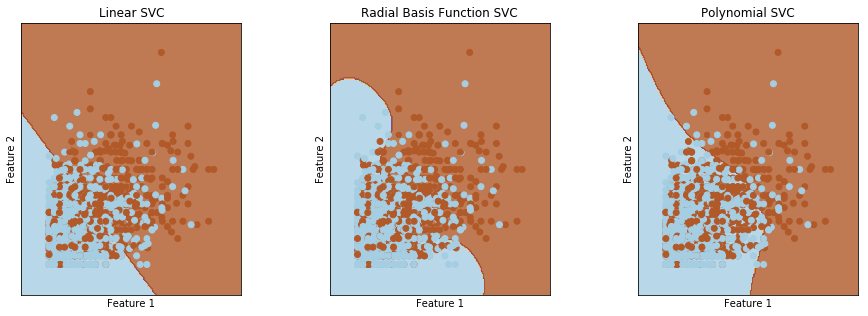

In [123]:
X_2D=X_tr[:, [20, 75]]
svc_linear_new = SVC(kernel='linear')
svc_linear_new.fit(X_2D, y_tr)
svc_rbf_new = SVC(kernel='rbf')
svc_rbf_new.fit(X_2D, y_tr)
svc_poly_new = SVC(kernel='poly')
svc_poly_new.fit(X_2D, y_tr)
classifiers=[svc_linear_new, svc_rbf_new, svc_poly_new]
show_svc_decision_boundaries(classifiers, X_2D, ['Linear SVC','Radial Basis Function SVC', 'Polynomial SVC'])

The Linear SVC tries to separate the data using a single line. It is visibly not doing a very good job.

The RBF is a bell-shaped curve, the RBF is a bell-shaped surface in two dimension in this case. It gives another dimension to the data which as a result is more separable because some of it fits well at the tip of the bell-shaped surface and others at dip. The result is a non-linear decision boundary.

By using the polynomial with the optimal degree we are transforming the data to a higher dimensional space. It also gives a non-linear decision boundary which is a better fit than a simple line for the distribution of our input data. The classifier performs worse than the RBF.


### ========== Question 1.21 --- [5 marks] ==========
So far we have used default parameters for training the SVM classifiers. Now we want to tune the parameters by using cross-validation. 

By using the `K-fold` iterator from Question 1.11 and training data only, estimate the classification accuracy of an SVM classifier with RBF kernel, while you vary the penalty parameter `C` in a logarithmic range `np.logspace(-2, 3, 10)`. Set the kernel coefficient parameter `gamma` to `auto` for this question. 

Plot the mean cross-validated classification accuracy against the regularisation parameter `C` by using a log-scale for the x-axis. Display the highest obtained mean accuracy score and the value of `C` which yielded it. Label axes appropriately. 

Finally, train a classifier by using the optimal value for this parameter (without using cross-validation at this stage) and report the classification accuracy on the training and validation sets. 

<font color='red'>TOTAL: 3</font>
<br>
<font color='green'>COMMENT: -</font>

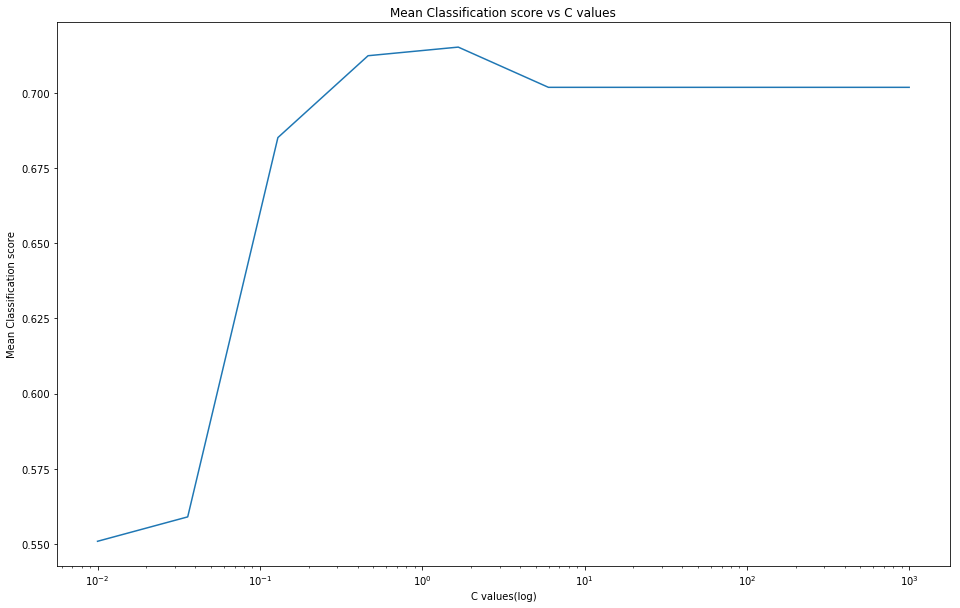

Optimal value for regularisation parameter C =  1.6681
Classification accuracy at optimal C value 0.7152
Classification Accuracy with ideal C on training set = 0.9747
Classification Accuracy with ideal C on validation set = 0.7278


In [124]:
score_array_rbf=[[],[],[]]
count=0
split=cross.split(X_tr)
for i, j in split:
    x_train_new, x_val_new = X_tr[i], X_tr[j]
    y_train_new, y_val_new = y_tr[i], y_tr[j]
    for para in np.logspace(-2, 3, 10):
        svc_rbf_optimal = SVC(kernel='rbf', gamma='auto', C=para)
        svc_rbf_optimal.fit(x_train_new, y_train_new)
        score_array_rbf[count].append(svc_rbf_optimal.score(x_val_new, y_val_new))
    count=count+1
plt.figure(figsize=(16, 10))
plt.plot(np.logspace(-2,3,10), np.mean(score_array_rbf, axis=0))
plt.title("Mean Classification score vs C values")
plt.ylabel("Mean Classification score")
plt.xlabel("C values(log)")
plt.xscale("log")
plt.show()
Cideal=np.logspace(-2,3,10)[np.mean(score_array_rbf, axis=0).argmax()]
print("Optimal value for regularisation parameter C = ", np.round(Cideal, decimals=4))
print("Classification accuracy at optimal C value", np.round(np.mean(score_array_rbf, axis=0)[np.mean(score_array_rbf, axis=0).argmax()], decimals=4))
svc_rbf_final = SVC(kernel='rbf', gamma='auto', C=Cideal)
svc_rbf_final.fit(X_tr, y_tr)
print("Classification Accuracy with ideal C on training set =", np.round(svc_rbf_final.score(X_tr, y_tr), decimals=4))
print("Classification Accuracy with ideal C on validation set =", np.round(svc_rbf_final.score(X_val, y_val), decimals=4))

### ========== Question 1.22 --- [5 marks] ==========
Now we turn to the kernel coefficient `gamma` parameter. By using the same procedure as in the previous question, estimate the classification accuracy of an SVM classifier with RBF kernel while you vary the `gamma` parameter in a logarithmic range `logspace(-5, 0, 10)`. Fix the penalty parameter `C=1.0`.

Plot the mean cross-validated classification accuracy against the parameter `gamma` by using a log-scale for the x-axis. Display the highest obtained mean accuracy score and the value of `gamma` which yielded it.  Label axes appropriately.

Finally, train a classifier by using the optimal value for this parameter (without using cross-validation at this stage) and report the classification accuracy on the training and validation sets. 

<font color='red'>TOTAL: 4</font>
<br>
<font color='green'>COMMENT: -</font>

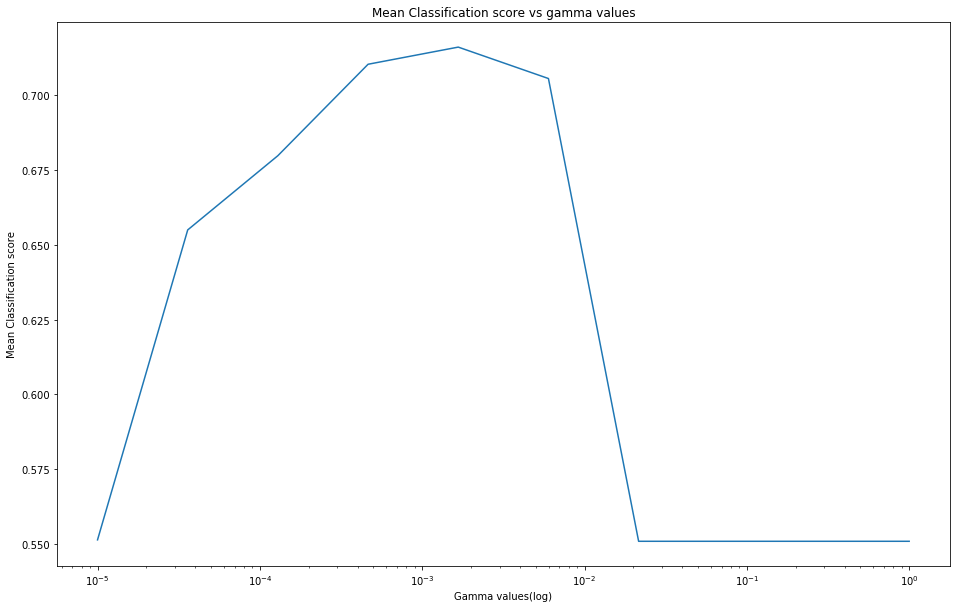

Optimal value for Gamma=  1.6681
Classification accuracy at optimal Gamma value 0.7162
Classification Accuracy with ideal gamma on training set = 0.8911
Classification Accuracy with ideal gamma on validation set = 0.7269


In [125]:
score_array_rbf_gamma=[[],[],[]]
count=0
split=cross.split(X_tr)
for i, j in split:
    x_train_new, x_val_new = X_tr[i], X_tr[j]
    y_train_new, y_val_new = y_tr[i], y_tr[j]
    for gammaval in np.logspace(-5, 0, 10):
        svc_rbf_gamma = SVC(kernel='rbf', gamma=gammaval, C=1.0 )
        svc_rbf_gamma.fit(x_train_new, y_train_new)
        score_array_rbf_gamma[count].append(svc_rbf_gamma.score(x_val_new, y_val_new))
    count=count+1
plt.figure(figsize=(16, 10))
plt.plot(np.logspace(-5,0,10), np.mean(score_array_rbf_gamma, axis=0))
plt.ylabel("Mean Classification score")
plt.title("Mean Classification score vs gamma values")
plt.xlabel("Gamma values(log)")
plt.xscale("log")
plt.show()
gammaideal=np.logspace(-5,0,10)[np.mean(score_array_rbf_gamma, axis=0).argmax()]
print("Optimal value for Gamma= ", np.round(Cideal, decimals=4))
print("Classification accuracy at optimal Gamma value", np.round(np.mean(score_array_rbf_gamma, axis=0)[np.mean(score_array_rbf_gamma, axis=0).argmax()], decimals=4))
svc_rbf_gamma_final = SVC(kernel='rbf', gamma=gammaideal, C=1.0)
svc_rbf_gamma_final.fit(X_tr, y_tr)
print("Classification Accuracy with ideal gamma on training set =", np.round(svc_rbf_gamma_final.score(X_tr, y_tr), decimals=4))
print("Classification Accuracy with ideal gamma on validation set =", np.round(svc_rbf_gamma_final.score(X_val, y_val), decimals=4))

### ========== Question 1.23 --- [7 marks] ==========
Now we wish to tune both the `C` and `gamma` parameters simultaneously. To save computational time, we will now constrain the parameter search space. Define a `4 X 4` grid for the two parameters, as follows:
* `C`: `np.logspace(-2, 1, 4)`
* `gamma`: `np.logspace(-4, -1, 4)`

Estimate the mean cross-validated classification accuracy by using training data only and all possible configurations for the two parameters. 

Use a [heatmap](https://seaborn.github.io/generated/seaborn.heatmap.html?highlight=heatmap#seaborn.heatmap) to visualise the mean cross-validated classification accuracy for all `C`-`gamma` pairs. Label axes appropriately and display the values for `C` and `gamma` for the best performing configuration. 

Finally, by using the optimal configuration, train a classifier (without using cross-validation) and report the classification accuracy on the training and validation sets.

<font color='red'>TOTAL: 5</font>
<br>
<font color='green'>COMMENT: -</font>

Optimal value for regularisation parameter gamma =  0.001
Optimal value for regularisation parameter C =  1.0
Classification Accuracy with ideal gamma on training set = 0.8347
Classification Accuracy with ideal gamma on validation set = 0.7215


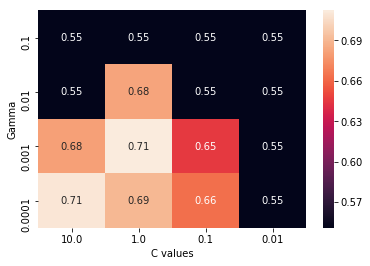

In [126]:
score_array_rbf_ultimate=[[[],[],[],[]],[[],[],[],[]],[[],[],[],[]]]
count=0
gammacounter=0
split=cross.split(X_tr)
for i, j in split:
    x_train_new, x_val_new = X_tr[i], X_tr[j]
    y_train_new, y_val_new = y_tr[i], y_tr[j]
    for gammaval in np.logspace(-4, -1, 4):
        for para in np.logspace(-2,1,4):
            svc_rbf_ultimate = SVC(kernel='rbf', gamma=gammaval, C=para )
            svc_rbf_ultimate.fit(x_train_new, y_train_new)
            score_array_rbf_ultimate[count][gammacounter].append(svc_rbf_ultimate.score(x_val_new, y_val_new))
            gammacounter=gammacounter+1
        gammacounter=0
    count=count+1
mean_scores=[[],[],[],[]]
for i in range(4):
    for j in range(4):
        mean_scores[i].append((score_array_rbf_ultimate[0][i][j]+score_array_rbf_ultimate[1][i][j]+score_array_rbf_ultimate[2][i][j])/3)
ax=sns.heatmap(mean_scores, xticklabels=np.logspace(-2,1,4)[::-1], yticklabels=np.logspace(-4,-1,4)[::-1] ,annot=True)
ax.set_xlabel('C values')
ax.set_ylabel('Gamma')
valuesarray=[[],[],[],[]]
count=0
optimumvalues=np.unravel_index(np.asarray(mean_scores).argmax(), np.asarray(mean_scores).shape)
optimumC=np.logspace(-2,1,4)[optimumvalues[0]]
optimumgamma=np.logspace(-4,-1,4)[optimumvalues[1]]
print("Optimal value for regularisation parameter gamma = ", optimumgamma)
print("Optimal value for regularisation parameter C = ", optimumC)
svc_rbf_pair=SVC(kernel='rbf', gamma=optimumgamma, C=optimumC)
svc_rbf_pair.fit(X_tr, y_tr)
print("Classification Accuracy with ideal gamma on training set =", np.round(svc_rbf_pair.score(X_tr, y_tr), decimals=4))
print("Classification Accuracy with ideal gamma on validation set =", np.round(svc_rbf_pair.score(X_val, y_val), decimals=4))

### ========== Question 1.24 --- [3 marks] ==========
Is the classification accuracy on the validation set higher than in previous questions (1.22-1.23)? If not, can you explain why? Can you think of a way of further improving the performance of the classifier? You don't need to implement your suggestion at this stage. Would there be any associated problems with your suggested approach? 

<font color='red'>TOTAL: 2</font>
<br>
<font color='green'>COMMENT: I would have liked to have seen a bit more analysis here.</font>

The classifcation accuracy score is roughly the same as previous questions. This is because we already found where the optimal gamma and C values. In order to accurately fine tune we would need to generate values that hover around the numbers we already found (C=1.0 and gamma=.001). We need to do a finer-grained search of the parameter space.



### ========== Question 1.25 --- [5 marks] ==========
Now we want to evaluate the performance of an SVM classifier with polynomial kernel. Once again, we will tune the `degree` parameter by using cross-validation (similarly to what we did in Questions 1.21 and 1.22).

By using the `K-fold` iterator from Question 1.11 and training data only, estimate the classification accuracy of polynomial SVM classifier, while you vary the `degree` parameter in the range `np.arange(1,8)`. 

Plot the mean cross-validated classification accuracy against the polynomial degree. Display the highest obtained mean accuracy score and the value of the `degree` parameter which yielded it. Label axes appropriately. 

Finally, train a classifier by using the optimal value for this parameter (without using cross-validation at this stage) and report the classification accuracy on the training and validation sets. 

<font color='red'>TOTAL: 3</font>
<br>
<font color='green'>COMMENT: -</font>

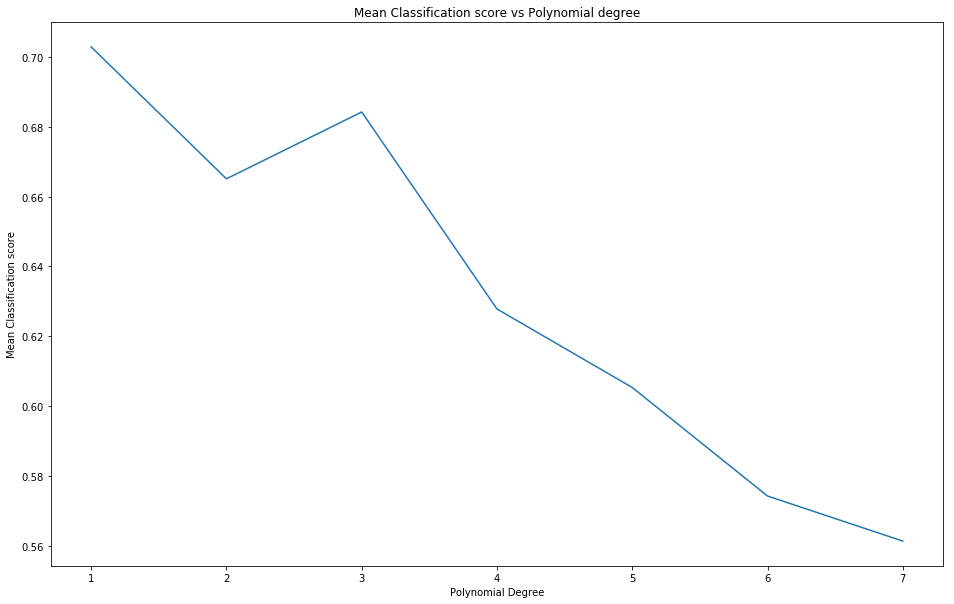

Optimal value for parameter degree =  1
Classification accuracy at optimal Degree value 0.7028
Classification Accuracy with ideal degree on training set = 0.7836
Classification Accuracy with ideal degree on validation set = 0.6891


In [128]:
score_array_poly=[[],[],[]]
count=0
split=cross.split(X_tr)
for i, j in split:
    x_train_new, x_val_new = X_tr[i], X_tr[j]
    y_train_new, y_val_new = y_tr[i], y_tr[j]
    for degreeval in np.arange(1,8):
        svc_rbf_poly = SVC(kernel='poly', degree=degreeval )
        svc_rbf_poly.fit(x_train_new, y_train_new)
        score_array_poly[count].append(svc_rbf_poly.score(x_val_new, y_val_new))
    count=count+1
plt.figure(figsize=(16, 10))
plt.plot(np.arange(1,8), np.mean(score_array_poly, axis=0))
plt.ylabel("Mean Classification score")
plt.title("Mean Classification score vs Polynomial degree")
plt.xlabel("Polynomial Degree")
plt.show()
degreeideal=np.arange(1,8)[np.mean(score_array_poly, axis=0).argmax()]
print("Optimal value for parameter degree = ", degreeideal)
print("Classification accuracy at optimal Degree value", np.round(np.mean(score_array_poly, axis=0)[np.mean(score_array_poly, axis=0).argmax()], decimals=4))
svc_rbf_poly_final = SVC(kernel='poly', degree=degreeideal)
svc_rbf_poly_final.fit(X_tr, y_tr)
print("Classification Accuracy with ideal degree on training set =", np.round(svc_rbf_poly_final.score(X_tr, y_tr), decimals=4))
print("Classification Accuracy with ideal degree on validation set =", np.round(svc_rbf_poly_final.score(X_val, y_val), decimals=4))

### ========== Question 1.26 --- [4 marks] ==========

You might have noticted that so far, we have used cross-validation for optimising the various tuning parameters (e.g. regularisation parameter in logistic regression, SVM kernel parameters) rather than hold-out validation, although we did have access to a validation set. Why do you think this is a good/bad idea? Give one advantage and one disadvantage of the two different approaches. Which one would you trust more in practice?

<font color='red'>TOTAL: 3</font>
<br>
<font color='green'>COMMENT: -</font>

We want to compare the performance of multiple models, we need a 'clean' validation set which has not be used to tune parameters. Comparing performance of models on a validation set which has been used to pick hyperparameters is not really meaningful.
The advantage of hold-out validation is that it is simple and takes less computation power. A disadvantage of hold-out is that it might not be random enough. The data may me unbalanced, it is possible for the training split to be very different from the testing split.
This is the advantage of cross-validation, it can create upto as many splits as there are data points. We can have many different training and testing sets from less data. With cross-validation we can generalise better because we have tested it against many validation sets and we don't need as much data.
The disadvantage of this method is that the training algorithm has to be rerun from scratch N times as we split it, which means it takes N times as much computation to make an evaluation.

### ========== Question 1.27 --- [6 marks] ==========

Reload the full training and validation data that contain all indicator variables for all object categories. Remove the `imgId` attribute but keep all of the class indicator variables in the dataset this time. Your training features should include all attributes except `is_person` which should be your target variable. 

Once again, use a [StandardScaler](http://scikit-learn.org/0.17/modules/generated/sklearn.preprocessing.StandardScaler.html) to standardise your training and validation features. Then train a Random Forest Classifier by using the entropy `criterion`, 500 `n_estimators`, and also set the `random_state` to 31. Report the classification accuracy on the training and validation sets.

Similarly to what we did in Question 1.18, order the features by decreasing importance and display the 50 most important features. 

Finally, answer the following questions:
* What do you notice by looking at the list of the best 50 features?
* How does the performance differ with respect to the case when the additional class indicator variables are not present (Question 1.16)? Relate your observations to the observed feature ranking.
* Would it be easy to make use of the results in practice? Briey explain your reasoning.

*(Hint: you might want to look at some of the [images](http://www.inf.ed.ac.uk/teaching/courses/iaml/2014/assts/asst3/images.html) to justify your explanations.)*

<font color='red'>TOTAL: 4</font>
<br>
<font color='green'>COMMENT: -</font>

In [129]:
data_path1=os.path.join(os.getcwd(), 'datasets', 'train_images_partA.csv')
train_A=pd.read_csv(data_path1, delimiter = ',')
data_path1=os.path.join(os.getcwd(), 'datasets', 'valid_images_partA.csv')
valid_A=pd.read_csv(data_path1, delimiter = ',')
X_tr=train_A.drop(train_A.columns[[0, 515]], axis=1)
X_val=valid_A.drop(valid_A.columns[[0, 515]], axis=1)
scaler_new=preprocessing.StandardScaler().fit(X_tr)
X_tr=scaler_new.transform(X_tr)
X_val=scaler_new.transform(X_val)
rf_new=RandomForestClassifier(criterion='entropy',n_estimators = 500, random_state=31).fit(X=X_tr, y=y_tr)
print('Classification Accuracy on training data: ',rf_new.score(X_tr,y_tr))
print('Classification Accuracy on validation data: ',rf_new.score(X_val,y_val))
feature_imp=rf_new.feature_importances_
featurelist=[]
print("50 most important features")
for index in np.sort(feature_imp)[-50:]:
    featurelist.append(train_A.columns[(np.where(feature_imp==index)[0][0]+1)])
for a in reversed(featurelist):
    print (a)

Classification Accuracy on training data:  1.0
Classification Accuracy on validation data:  0.711590296496
50 most important features
is_cat
is_bird
dim21
dim51
dim360
dim4
dim76
dim398
dim283
dim479
dim263
dim343
dim423
dim485
dim254
dim461
dim222
dim356
dim74
dim288
dim214
dim348
dim330
dim217
dim483
dim90
dim274
dim347
dim17
dim427
dim35
dim326
dim73
dim312
dim48
dim25
dim315
dim322
dim329
dim500
dim134
dim206
is_aeroplane
dim96
dim353
dim442
dim77
dim440
dim171
dim154


The features 'is_cat' and 'is_bird are now the top features. Other than that is_aeroplane is also added. Otherwise all the other feature importances that were dimensions are the same as previously observed. This suggests that there are lots of photographs in our dataset with cats and birds that suggest whether a person is present in the photo or not. The photos that contain either cats or birds tend to not contain a person and therefore these attributes suggest that a person is not present in the photo.
Using these features does not make sense in practice. This is because the 500 features from the bag of words are generated automatically by an algorithm. We could derive these features on new images simply by running an algorithm.
On the other hand the is_cat and is_bird features that exist in our training dataset are being done by human supervision. It wouldn't make sense to use them in a practical scenario because the process would not scale. We would need to spend a lot of time to categorise the photographs. In this case we might as well make the person classify the photograph as having a person or not. If they are going through the photos looking for cats and birds anyway, they can easily tell if there is a person in it, making the whole process pointless.

## Mini challenge [30%]

<font color='red'>TOTAL: 27</font>
<br>
<font color='green'>COMMENT: <br>Feedback on your results:<br/>Congratulations: Your solution was in the top 10%. You nailed it!!! You completely destroyed my RF baseline. I fitted the Random Forest model out of the box with minimal tuning (I increased number of trees and performed a short search for a good value for max_features). I would always recommend this model for tabular data as your first step after a Dummy Baseline. This model got a logloss of 0.5965.<br/><br/>- JO<br/>Feedback on your discussion:<br/>Good thinking on outliers, though note that you should have checked that the test data does not contain similar outliers. If it does, you should have kept the training outliers. For RandomForest, you could have also explored max_features and the branching algorithms. Didn't use feature engineering (PCA) and feature selection. Otherwise, good discussion and plots.</font>

*Important: You are allowed to write up to a maximum of 600 words in this part of the assignment. The thoroughness of the exploration and the quality of the resulting discussion is just as important as the final classification performance of your chosen method(s) and credit will be divided accordingly.*

In this final part of the assignment we will have a mini object-recognition challenge. Using the data provided you are asked to find the best classiffier for the person/no person classification task. You can apply any preprocessing steps to the data that you think fit and employ any classifier you like (with the provison that you can explain what the classifier is/preprocessing steps are doing). You can also employ any lessons learnt during the course, either from previous Assignments, the Labs or the lecture material to try and squeeze out as much performance as you possibly can. The only restriction is that all steps must be performed in `Python` by using the `numpy`, `pandas` and `sklearn` packages. You can also make use of `matplotlib` and `seaborn` for visualisation. 

**Important:** The classification performance metric that we will use for this part is the *cross-entropy* or *logarithmic loss* (see the labs). You should familiarise yourself with the metric by reading the `sklearn` [user guide](http://scikit-learn.org/stable/modules/model_evaluation.html#log-loss) and [documentation](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html#sklearn.metrics.log_loss). To estimate this metric you will need to evaluate probability outputs, as opposed to discrete predictions which we have used so far to compute classification accuracies. Most models in `sklearn` implement a `predict_proba()` method which returns the probabilities for each class. For instance, if your test set consists of `N` datapoints and there are `K` classes, the method will return a `N` x `K` matrix.

We provide you with three new data sets: a training set (`train_images_partB.csv`), a validation set (`valid_images_partB.csv`), and a test set (`test_images_partB.csv`). You must use the former two for training and evaluating your models (as you see fit). Once you have chosen your favourite model (and pre-processing steps) you should apply it to the test set (for which no labels are provided). Estimate the posterior proabilities for the data points in the test set and submit your results as part of your answer. Your results will be evaluated in terms of the logarithmic loss metric. You also need to submit a brief description of the approaches you considered, your suggested final approach, and a short explanation of why you chose it. The thoroughness of the exploration and the quality of the resulting discussion is just as important as the final score of your chosen method(s) and credit will be divided accordingly.

*Hint: Feature engineering, feature combination, model combination and model parameter optimization can significantly improve performance.*

**How to submit your results**: Store the estimated probabilities for the data points in the test set in a 2D numpy array. Then execute the provided cell at the end of this notebook which uses a provided `save_predictions` function to export your results into a `.txt` file (the function will return an error if the provided array has not the right shape). The `.txt` file will be saved where your notebook lives. Submit this file along with your notebook as detailed at the top of this file.

My answer:

I start with a basic inspection of the dataset. I run a basic Logistic Regression classifier to get an idea of a starting estimate to compare future models to (log loss of 0.68). 20 images had ridiculously high values for some of the dimensions(above 9), while most had less than 0.02. These 20 images must be outliers and I remove the images from the data. I don't exploit the is_bird, is_cat and related attributes since these would not be present in the future unseen data. I process the data using a Standard Scaler. This already shows improvements on the Logistic Regression classifier in terms of accuracy, but not log loss(0.83). I split the data into 7 folds(I liked this number because it divided the data evenly, 2093 is divisible by 7). I try to optimize a C value and both accuracy and log loss improves(0.60) for the Logistic Regression classifier.
I use a Random Forest classifier, I optimize the depth of the tree(220 estimators) for best result of log loss(0.584). Next I train a RBF SVC and find the optimal gamma(0.001) and C(1.467) values for log loss (0.549). The best log loss(0.549) and accuracy values(0.72) are achieved so far. Finally we train a polynomial svc and find the optimal degree(2), the log loss is (0.58). I decide to try and combine my models to see if this improves performance using a Voting Classifier. I assign weights ranging from 1 to 3 to each of the random forest, SVC RBM and SVC polynomial classifiers. The conclusion is that the model perfroms best when the SVC RBF has the highest weight. This is definitely the best classifier out of my models. I fine tune the C(1.9) and gamma values(0.004) for SVC RBF classifier based on the previously achieved values. The final log loss of this classifier is 0.5384 and the classification accuracy is 0.7314 on the validation set. I am satisfied with these values and decide to use this as my final model.


In [131]:
data_path1=os.path.join(os.getcwd(), 'datasets', 'train_images_partB.csv')
train_B=pd.read_csv(data_path1, delimiter = ',')
data_path1=os.path.join(os.getcwd(), 'datasets', 'valid_images_partB.csv')
valid_B=pd.read_csv(data_path1, delimiter = ',')
data_path1=os.path.join(os.getcwd(), 'datasets', 'test_images_partB.csv')
test_B=pd.read_csv(data_path1, delimiter = ',')
print('Number of data points and: {}, number of attributes: {} in trainB'.format(train_B.shape[0], train_B.shape[1]))
print('Number of data points and: {}, number of attributes: {} in validB'.format(valid_B.shape[0], valid_B.shape[1]))
print('Number of data points and: {}, number of attributes: {} in testB'.format(test_B.shape[0], test_B.shape[1]))

Number of data points and: 2113, number of attributes: 520 in trainB
Number of data points and: 1113, number of attributes: 520 in validB
Number of data points and: 1114, number of attributes: 501 in testB


In [132]:
train_B.describe()

,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,...,is_cow,is_diningtable,is_dog,is_horse,is_motorbike,is_person,is_pottedplant,is_sheep,is_sofa,is_tvmonitor
count,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,...,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000
mean,0.043353,0.050830,0.047988,0.037411,0.043365,0.049670,0.051071,0.043601,0.052698,0.054139,...,0.017511,0.025083,0.088027,0.045433,0.048273,0.448178,0.040227,0.015144,0.032655,0.050639
std,0.513260,0.582839,0.482166,0.464611,0.491187,0.558422,0.577599,0.472706,0.571629,0.588484,...,0.131195,0.156414,0.283401,0.208301,0.214392,0.497425,0.196538,0.122156,0.177774,0.219311
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000868,0.000000,0.001359,0.000781,0.001116,0.001019,0.000340,0.000651,0.000756,0.001116,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.001616,0.000340,0.003516,0.001698,0.002038,0.001860,0.000756,0.001645,0.001698,0.002155,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.002404,0.001008,0.006454,0.002717,0.003125,0.003057,0.001488,0.003397,0.002734,0.003736,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,9.984000,9.122238,7.676800,9.695738,8.762671,9.489078,9.751526,8.691076,9.013933,9.602705,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [133]:
atrib_list=train_B.columns[1:501].tolist()
X_tr=train_B[atrib_list].values
X_val=valid_B[atrib_list].values
y_tr=train_B["is_person"].values
y_val=valid_B["is_person"].values
for i in range(500):
    print("dimension"+str(i)+":   Max Value:"+str(X_tr.max(axis=0)[i])+"    Min Value:"+str(X_tr.min(axis=0)[i])+"    Standard Deviation:"+str(X_tr.std(axis=0)[i]))

dimension0:   Max Value:9.984    Min Value:0.0    Standard Deviation:0.513138830244
dimension1:   Max Value:9.122238    Min Value:0.0    Standard Deviation:0.582701162222
dimension2:   Max Value:7.6768    Min Value:0.0    Standard Deviation:0.482052328782
dimension3:   Max Value:9.695738    Min Value:0.0    Standard Deviation:0.464500789185
dimension4:   Max Value:8.762671    Min Value:0.0    Standard Deviation:0.491070592447
dimension5:   Max Value:9.489078    Min Value:0.0    Standard Deviation:0.558289743631
dimension6:   Max Value:9.751526    Min Value:0.0    Standard Deviation:0.577462781466
dimension7:   Max Value:8.691076    Min Value:0.0    Standard Deviation:0.472594300793
dimension8:   Max Value:9.013933    Min Value:0.0    Standard Deviation:0.571494108061
dimension9:   Max Value:9.602705    Min Value:0.0    Standard Deviation:0.588345205439
dimension10:   Max Value:8.666184    Min Value:0.0    Standard Deviation:0.584524710609
dimension11:   Max Value:7.692537    Min Value:

dimension134:   Max Value:9.763808    Min Value:0.0    Standard Deviation:0.526904445616
dimension135:   Max Value:8.764372    Min Value:0.0    Standard Deviation:0.452853026658
dimension136:   Max Value:9.266087    Min Value:0.0    Standard Deviation:0.540737093993
dimension137:   Max Value:9.37364    Min Value:0.0    Standard Deviation:0.522475368339
dimension138:   Max Value:9.690052    Min Value:0.0    Standard Deviation:0.596864795155
dimension139:   Max Value:9.806981    Min Value:0.0    Standard Deviation:0.605087270144
dimension140:   Max Value:9.918231    Min Value:0.0    Standard Deviation:0.514416674487
dimension141:   Max Value:9.828741    Min Value:0.0    Standard Deviation:0.432631868419
dimension142:   Max Value:9.761038    Min Value:0.0    Standard Deviation:0.568933895968
dimension143:   Max Value:9.610308    Min Value:0.0    Standard Deviation:0.569202129196
dimension144:   Max Value:8.167007    Min Value:0.0    Standard Deviation:0.407820999034
dimension145:   Max Va

dimension256:   Max Value:9.738042    Min Value:0.0    Standard Deviation:0.584044397064
dimension257:   Max Value:9.858716    Min Value:0.0    Standard Deviation:0.618321715534
dimension258:   Max Value:9.459321    Min Value:0.0    Standard Deviation:0.516708449506
dimension259:   Max Value:9.823614    Min Value:0.0    Standard Deviation:0.622823771649
dimension260:   Max Value:9.918681    Min Value:0.0    Standard Deviation:0.447432298563
dimension261:   Max Value:9.410985    Min Value:0.0    Standard Deviation:0.572676827466
dimension262:   Max Value:9.506372    Min Value:0.0    Standard Deviation:0.604712718192
dimension263:   Max Value:9.56503    Min Value:0.0    Standard Deviation:0.547551830528
dimension264:   Max Value:9.300734    Min Value:0.0    Standard Deviation:0.594064633479
dimension265:   Max Value:9.8395    Min Value:0.0    Standard Deviation:0.523756055857
dimension266:   Max Value:9.917878    Min Value:0.0    Standard Deviation:0.671729095928
dimension267:   Max Valu

dimension382:   Max Value:9.420335    Min Value:0.0    Standard Deviation:0.519984522056
dimension383:   Max Value:8.387488    Min Value:0.0    Standard Deviation:0.455343593066
dimension384:   Max Value:9.907264    Min Value:0.0    Standard Deviation:0.538935430125
dimension385:   Max Value:9.851241    Min Value:0.0    Standard Deviation:0.53534883928
dimension386:   Max Value:9.460018    Min Value:0.0    Standard Deviation:0.435498949465
dimension387:   Max Value:8.754431    Min Value:0.0    Standard Deviation:0.560085627439
dimension388:   Max Value:9.421225    Min Value:0.0    Standard Deviation:0.579248212015
dimension389:   Max Value:9.968433    Min Value:0.0    Standard Deviation:0.649824431194
dimension390:   Max Value:7.809235    Min Value:0.0    Standard Deviation:0.402556204391
dimension391:   Max Value:9.550051    Min Value:0.0    Standard Deviation:0.620162778779
dimension392:   Max Value:9.823838    Min Value:0.0    Standard Deviation:0.497576069058
dimension393:   Max Va

dimension480:   Max Value:9.918212    Min Value:0.0    Standard Deviation:0.521476406121
dimension481:   Max Value:8.246583    Min Value:0.0    Standard Deviation:0.487843619439
dimension482:   Max Value:9.577727    Min Value:0.0    Standard Deviation:0.601530164808
dimension483:   Max Value:9.932087    Min Value:0.0    Standard Deviation:0.595772803921
dimension484:   Max Value:9.940516    Min Value:0.0    Standard Deviation:0.65618026442
dimension485:   Max Value:9.62189    Min Value:0.0    Standard Deviation:0.456690059589
dimension486:   Max Value:9.614839    Min Value:0.0    Standard Deviation:0.50574185771
dimension487:   Max Value:9.983335    Min Value:0.0    Standard Deviation:0.58987410291
dimension488:   Max Value:9.8333    Min Value:0.0    Standard Deviation:0.574282823205
dimension489:   Max Value:9.692247    Min Value:0.0    Standard Deviation:0.590641755394
dimension490:   Max Value:9.92215    Min Value:0.0    Standard Deviation:0.560978580606
dimension491:   Max Value:9.

In [134]:
lr=LogisticRegression(solver='lbfgs')
lr.fit(X_tr, y_tr)
print("Logistic Regression score on training set: ", np.round(lr.score(X_tr, y_tr), decimals=4))
print("Logistic Regression score on validation set: ", np.round(lr.score(X_val, y_val), decimals=4))
pred_proba = lr.predict_proba(X_val)
this_logloss = log_loss(y_val, pred_proba)
print("Log loss on this  Logisitic Regression Classifier:", this_logloss)

Logistic Regression score on training set:  0.5551
Logistic Regression score on validation set:  0.5265
Log loss on this  Logisitic Regression Classifier: 0.679521645125


In [135]:
for i in range(2113):
    print("image"+str(i)+":   Max Value:"+str(X_tr.max(axis=1)[i])+"    Min Value:"+str(X_tr.min(axis=1)[i])+"    Standard Deviation:"+str(X_tr.std(axis=1)[i]))

image0:   Max Value:0.012556    Min Value:0.0    Standard Deviation:0.00170181766313
image1:   Max Value:0.0125    Min Value:0.0    Standard Deviation:0.00169263273708
image2:   Max Value:0.017708    Min Value:0.0    Standard Deviation:0.00229174702193
image3:   Max Value:0.015253    Min Value:0.0    Standard Deviation:0.00181100527249
image4:   Max Value:0.027174    Min Value:0.0    Standard Deviation:0.00215062075163
image5:   Max Value:0.122768    Min Value:0.0    Standard Deviation:0.00701383599092
image6:   Max Value:0.016644    Min Value:0.0    Standard Deviation:0.00234602662762
image7:   Max Value:0.04548    Min Value:0.0    Standard Deviation:0.00525198170867
image8:   Max Value:0.013927    Min Value:0.0    Standard Deviation:0.00155949268188
image9:   Max Value:0.009511    Min Value:0.0    Standard Deviation:0.00149942794924
image10:   Max Value:0.011549    Min Value:0.0    Standard Deviation:0.00168591065988
image11:   Max Value:0.011054    Min Value:0.0    Standard Deviatio

image107:   Max Value:0.008078    Min Value:0.0    Standard Deviation:0.00141170756019
image108:   Max Value:0.010204    Min Value:0.0    Standard Deviation:0.00156382909532
image109:   Max Value:0.030571    Min Value:0.0    Standard Deviation:0.00336545323002
image110:   Max Value:0.008929    Min Value:0.0    Standard Deviation:0.0017419054563
image111:   Max Value:0.010204    Min Value:0.0    Standard Deviation:0.00189956869417
image112:   Max Value:0.019558    Min Value:0.0    Standard Deviation:0.00179565838325
image113:   Max Value:0.055272    Min Value:0.0    Standard Deviation:0.00320615507517
image114:   Max Value:0.009511    Min Value:0.0    Standard Deviation:0.00170874232822
image115:   Max Value:0.010045    Min Value:0.0    Standard Deviation:0.00181494246564
image116:   Max Value:0.013587    Min Value:0.0    Standard Deviation:0.00172783623608
image117:   Max Value:0.011328    Min Value:0.0    Standard Deviation:0.0018515847163
image118:   Max Value:0.02381    Min Value:0.

image217:   Max Value:0.01087    Min Value:0.0    Standard Deviation:0.00157347245204
image218:   Max Value:0.012277    Min Value:0.0    Standard Deviation:0.00180193880296
image219:   Max Value:0.025476    Min Value:0.0    Standard Deviation:0.0020723686537
image220:   Max Value:0.076322    Min Value:0.0    Standard Deviation:0.00412069529512
image221:   Max Value:0.030231    Min Value:0.0    Standard Deviation:0.00259308872326
image222:   Max Value:0.015285    Min Value:0.0    Standard Deviation:0.00212753420442
image223:   Max Value:0.015253    Min Value:0.0    Standard Deviation:0.00170631952199
image224:   Max Value:0.027778    Min Value:0.0    Standard Deviation:0.00329203317581
image225:   Max Value:0.012302    Min Value:0.0    Standard Deviation:0.00165730800292
image226:   Max Value:0.011364    Min Value:0.0    Standard Deviation:0.00169025421322
image227:   Max Value:0.039402    Min Value:0.0    Standard Deviation:0.00309945117941
image228:   Max Value:0.011068    Min Value:0

image315:   Max Value:0.022418    Min Value:0.0    Standard Deviation:0.00266495924342
image316:   Max Value:0.015965    Min Value:0.0    Standard Deviation:0.00172555644205
image317:   Max Value:0.008065    Min Value:0.0    Standard Deviation:0.00164824733645
image318:   Max Value:0.03125    Min Value:0.0    Standard Deviation:0.00326169078543
image319:   Max Value:0.018229    Min Value:0.0    Standard Deviation:0.00219124874908
image320:   Max Value:0.00875    Min Value:0.0    Standard Deviation:0.00168135592522
image321:   Max Value:0.014946    Min Value:0.0    Standard Deviation:0.00180221980976
image322:   Max Value:0.018601    Min Value:0.0    Standard Deviation:0.00188780483893
image323:   Max Value:0.010324    Min Value:0.0    Standard Deviation:0.00174192712796
image324:   Max Value:0.027902    Min Value:0.0    Standard Deviation:0.00214425035165
image325:   Max Value:0.013247    Min Value:0.0    Standard Deviation:0.00183695382409
image326:   Max Value:0.019832    Min Value:0

image426:   Max Value:0.012277    Min Value:0.0    Standard Deviation:0.00178076633591
image427:   Max Value:0.05    Min Value:0.0    Standard Deviation:0.00500293082072
image428:   Max Value:9.995523    Min Value:0.003005    Standard Deviation:2.8802884397
image429:   Max Value:0.009511    Min Value:0.0    Standard Deviation:0.0017911554215
image430:   Max Value:0.012812    Min Value:0.0    Standard Deviation:0.00178229174537
image431:   Max Value:0.009301    Min Value:0.0    Standard Deviation:0.00155898783723
image432:   Max Value:0.008594    Min Value:0.0    Standard Deviation:0.00151633304755
image433:   Max Value:0.010937    Min Value:0.0    Standard Deviation:0.00173923292082
image434:   Max Value:0.013587    Min Value:0.0    Standard Deviation:0.0018834746807
image435:   Max Value:0.03091    Min Value:0.0    Standard Deviation:0.00253128804614
image436:   Max Value:0.011889    Min Value:0.0    Standard Deviation:0.00163066928935
image437:   Max Value:0.017485    Min Value:0.0  

image537:   Max Value:0.011889    Min Value:0.0    Standard Deviation:0.00189872118624
image538:   Max Value:0.028872    Min Value:0.0    Standard Deviation:0.00359817002596
image539:   Max Value:0.012568    Min Value:0.0    Standard Deviation:0.00198638985336
image540:   Max Value:0.008185    Min Value:0.0    Standard Deviation:0.00139778982759
image541:   Max Value:0.013158    Min Value:0.0    Standard Deviation:0.00241508214546
image542:   Max Value:0.012568    Min Value:0.0    Standard Deviation:0.00164924585252
image543:   Max Value:0.011889    Min Value:0.0    Standard Deviation:0.00161688336966
image544:   Max Value:0.019717    Min Value:0.0    Standard Deviation:0.00231497712757
image545:   Max Value:0.013247    Min Value:0.0    Standard Deviation:0.00182663597405
image546:   Max Value:0.02072    Min Value:0.0    Standard Deviation:0.00208281678715
image547:   Max Value:0.009375    Min Value:0.0    Standard Deviation:0.00142951524475
image548:   Max Value:0.021399    Min Value:

image648:   Max Value:0.010417    Min Value:0.0    Standard Deviation:0.00195374982126
image649:   Max Value:0.02381    Min Value:0.0    Standard Deviation:0.00212064574434
image650:   Max Value:0.024796    Min Value:0.0    Standard Deviation:0.00207846614437
image651:   Max Value:0.013587    Min Value:0.0    Standard Deviation:0.00154865621488
image652:   Max Value:0.011549    Min Value:0.0    Standard Deviation:0.00173671344196
image653:   Max Value:0.014266    Min Value:0.0    Standard Deviation:0.0017804194571
image654:   Max Value:0.008832    Min Value:0.0    Standard Deviation:0.00185418593221
image655:   Max Value:0.011549    Min Value:0.0    Standard Deviation:0.00236552876738
image656:   Max Value:0.014946    Min Value:0.0    Standard Deviation:0.00203029945178
image657:   Max Value:0.016602    Min Value:0.0    Standard Deviation:0.00183315693274
image658:   Max Value:0.139266    Min Value:0.0    Standard Deviation:0.00653691278919
image659:   Max Value:0.10462    Min Value:0.

image759:   Max Value:0.020833    Min Value:0.0    Standard Deviation:0.00206040503017
image760:   Max Value:0.007487    Min Value:0.0    Standard Deviation:0.00147677164249
image761:   Max Value:0.031994    Min Value:0.0    Standard Deviation:0.00231617911941
image762:   Max Value:0.064878    Min Value:0.0    Standard Deviation:0.00329892394634
image763:   Max Value:0.021399    Min Value:0.0    Standard Deviation:0.00226758807559
image764:   Max Value:0.085565    Min Value:0.0    Standard Deviation:0.0050401949579
image765:   Max Value:0.014266    Min Value:0.0    Standard Deviation:0.00198302938663
image766:   Max Value:0.01087    Min Value:0.0    Standard Deviation:0.00153519273385
image767:   Max Value:0.013672    Min Value:0.0    Standard Deviation:0.00173204528884
image768:   Max Value:0.015625    Min Value:0.0    Standard Deviation:0.00227983720022
image769:   Max Value:0.01863    Min Value:0.0    Standard Deviation:0.00270289414325
image770:   Max Value:0.036005    Min Value:0.

image867:   Max Value:9.965948    Min Value:0.002122    Standard Deviation:2.82889858813
image868:   Max Value:0.083654    Min Value:0.0    Standard Deviation:0.00690902052302
image869:   Max Value:0.014606    Min Value:0.0    Standard Deviation:0.00180285141123
image870:   Max Value:0.026634    Min Value:0.0    Standard Deviation:0.00198869784912
image871:   Max Value:0.013765    Min Value:0.0    Standard Deviation:0.00227920067996
image872:   Max Value:0.018229    Min Value:0.0    Standard Deviation:0.00203009720958
image873:   Max Value:0.19803    Min Value:0.0    Standard Deviation:0.00985588489857
image874:   Max Value:0.016304    Min Value:0.0    Standard Deviation:0.00163393806097
image875:   Max Value:0.012568    Min Value:0.0    Standard Deviation:0.00182773581433
image876:   Max Value:0.027853    Min Value:0.0    Standard Deviation:0.00236446688619
image877:   Max Value:0.02038    Min Value:0.0    Standard Deviation:0.00189823585223
image878:   Max Value:0.08631    Min Value:

image978:   Max Value:0.018003    Min Value:0.0    Standard Deviation:0.00229814478701
image979:   Max Value:0.03776    Min Value:0.0    Standard Deviation:0.00331952391435
image980:   Max Value:0.013927    Min Value:0.0    Standard Deviation:0.00194852022336
image981:   Max Value:0.011533    Min Value:0.0    Standard Deviation:0.00217847113517
image982:   Max Value:0.028274    Min Value:0.0    Standard Deviation:0.00181299317459
image983:   Max Value:0.020313    Min Value:0.0    Standard Deviation:0.00289485794941
image984:   Max Value:0.009171    Min Value:0.0    Standard Deviation:0.00168604317873
image985:   Max Value:0.007738    Min Value:0.0    Standard Deviation:0.00144120729937
image986:   Max Value:0.017485    Min Value:0.0    Standard Deviation:0.00251928427113
image987:   Max Value:0.007812    Min Value:0.0    Standard Deviation:0.00162397832893
image988:   Max Value:0.012451    Min Value:0.0    Standard Deviation:0.00207683264786
image989:   Max Value:0.025136    Min Value:

image1083:   Max Value:0.008557    Min Value:0.0    Standard Deviation:0.00158974249051
image1084:   Max Value:0.321562    Min Value:0.0    Standard Deviation:0.0149824163428
image1085:   Max Value:0.011549    Min Value:0.0    Standard Deviation:0.00191505161268
image1086:   Max Value:0.060122    Min Value:0.0    Standard Deviation:0.00338055532527
image1087:   Max Value:0.015285    Min Value:0.0    Standard Deviation:0.00207625831241
image1088:   Max Value:0.019688    Min Value:0.0    Standard Deviation:0.00206155969142
image1089:   Max Value:0.024444    Min Value:0.0    Standard Deviation:0.00260076199953
image1090:   Max Value:0.031622    Min Value:0.0    Standard Deviation:0.00265517091312
image1091:   Max Value:0.017663    Min Value:0.0    Standard Deviation:0.00341778680961
image1092:   Max Value:0.026953    Min Value:0.0    Standard Deviation:0.00318345008764
image1093:   Max Value:0.028533    Min Value:0.0    Standard Deviation:0.00303242281482
image1094:   Max Value:0.010417  

image1212:   Max Value:0.012568    Min Value:0.0    Standard Deviation:0.00161516212805
image1213:   Max Value:0.008152    Min Value:0.0    Standard Deviation:0.00143109329919
image1214:   Max Value:0.02939    Min Value:0.0    Standard Deviation:0.00226164312631
image1215:   Max Value:0.019062    Min Value:0.0    Standard Deviation:0.00253303185146
image1216:   Max Value:0.009171    Min Value:0.0    Standard Deviation:0.00163912780209
image1217:   Max Value:0.010937    Min Value:0.0    Standard Deviation:0.00160339480755
image1218:   Max Value:0.039885    Min Value:0.0    Standard Deviation:0.00325615132285
image1219:   Max Value:0.014606    Min Value:0.0    Standard Deviation:0.00191575531562
image1220:   Max Value:0.019361    Min Value:0.0    Standard Deviation:0.00246738369486
image1221:   Max Value:0.01087    Min Value:0.0    Standard Deviation:0.00212218830859
image1222:   Max Value:0.015625    Min Value:0.0    Standard Deviation:0.00182894816575
image1223:   Max Value:0.012228   

image1323:   Max Value:0.02381    Min Value:0.0    Standard Deviation:0.00386211854164
image1324:   Max Value:0.013927    Min Value:0.0    Standard Deviation:0.00201511476945
image1325:   Max Value:0.009171    Min Value:0.0    Standard Deviation:0.00167506676476
image1326:   Max Value:0.009375    Min Value:0.0    Standard Deviation:0.00172909794843
image1327:   Max Value:0.036685    Min Value:0.0    Standard Deviation:0.00322512407915
image1328:   Max Value:0.015625    Min Value:0.0    Standard Deviation:0.00188395434444
image1329:   Max Value:0.009277    Min Value:0.0    Standard Deviation:0.00190433069447
image1330:   Max Value:0.022859    Min Value:0.0    Standard Deviation:0.00264647774307
image1331:   Max Value:0.025    Min Value:0.0    Standard Deviation:0.00307569743069
image1332:   Max Value:0.008152    Min Value:0.0    Standard Deviation:0.001574631394
image1333:   Max Value:0.041667    Min Value:0.0    Standard Deviation:0.00526120021691
image1334:   Max Value:0.042783    Min

image1434:   Max Value:0.023098    Min Value:0.0    Standard Deviation:0.00353218186761
image1435:   Max Value:0.01863    Min Value:0.0    Standard Deviation:0.00231935459081
image1436:   Max Value:0.032366    Min Value:0.0    Standard Deviation:0.00293341827927
image1437:   Max Value:0.01053    Min Value:0.0    Standard Deviation:0.00141943928093
image1438:   Max Value:0.015285    Min Value:0.0    Standard Deviation:0.00152973996715
image1439:   Max Value:0.01087    Min Value:0.0    Standard Deviation:0.00153727690502
image1440:   Max Value:0.042614    Min Value:0.0    Standard Deviation:0.00401096593717
image1441:   Max Value:0.027902    Min Value:0.0    Standard Deviation:0.00255701723928
image1442:   Max Value:0.022758    Min Value:0.0    Standard Deviation:0.00288459607709
image1443:   Max Value:0.021577    Min Value:0.0    Standard Deviation:0.00264805913232
image1444:   Max Value:0.009851    Min Value:0.0    Standard Deviation:0.00176807762608
image1445:   Max Value:0.010417    

image1545:   Max Value:0.01893    Min Value:0.0    Standard Deviation:0.00219017469638
image1546:   Max Value:0.029552    Min Value:0.0    Standard Deviation:0.0030160012751
image1547:   Max Value:0.032986    Min Value:0.0    Standard Deviation:0.00354454669299
image1548:   Max Value:0.086957    Min Value:0.0    Standard Deviation:0.00530034328228
image1549:   Max Value:0.011549    Min Value:0.0    Standard Deviation:0.00223427342994
image1550:   Max Value:0.009171    Min Value:0.0    Standard Deviation:0.00148785894
image1551:   Max Value:0.027853    Min Value:0.0    Standard Deviation:0.00350100574463
image1552:   Max Value:0.016984    Min Value:0.0    Standard Deviation:0.00235192459317
image1553:   Max Value:0.013927    Min Value:0.0    Standard Deviation:0.00155535202171
image1554:   Max Value:0.008832    Min Value:0.0    Standard Deviation:0.00143109931051
image1555:   Max Value:0.03091    Min Value:0.0    Standard Deviation:0.00305607198835
image1556:   Max Value:0.023684    Min

image1656:   Max Value:0.018359    Min Value:0.0    Standard Deviation:0.00237429280838
image1657:   Max Value:0.009171    Min Value:0.0    Standard Deviation:0.00166025749678
image1658:   Max Value:0.008929    Min Value:0.0    Standard Deviation:0.00166012641403
image1659:   Max Value:0.016984    Min Value:0.0    Standard Deviation:0.0021386683108
image1660:   Max Value:0.023098    Min Value:0.0    Standard Deviation:0.00223150440475
image1661:   Max Value:0.021399    Min Value:0.0    Standard Deviation:0.00229361665276
image1662:   Max Value:0.009511    Min Value:0.0    Standard Deviation:0.00162469126078
image1663:   Max Value:0.036005    Min Value:0.0    Standard Deviation:0.00275120042775
image1664:   Max Value:0.008594    Min Value:0.0    Standard Deviation:0.00151331412043
image1665:   Max Value:0.03756    Min Value:0.0    Standard Deviation:0.00397619634131
image1666:   Max Value:0.012891    Min Value:0.0    Standard Deviation:0.00177864698624
image1667:   Max Value:0.013587   

image1767:   Max Value:0.017882    Min Value:0.0    Standard Deviation:0.00204519584902
image1768:   Max Value:0.016563    Min Value:0.0    Standard Deviation:0.00178767845141
image1769:   Max Value:0.01053    Min Value:0.0    Standard Deviation:0.00174308917048
image1770:   Max Value:0.037642    Min Value:0.0    Standard Deviation:0.00374163494012
image1771:   Max Value:0.046503    Min Value:0.0    Standard Deviation:0.00465838882379
image1772:   Max Value:0.013927    Min Value:0.0    Standard Deviation:0.00201924171029
image1773:   Max Value:0.01125    Min Value:0.0    Standard Deviation:0.00240539757629
image1774:   Max Value:0.008333    Min Value:0.0    Standard Deviation:0.00168611928874
image1775:   Max Value:0.067708    Min Value:0.0    Standard Deviation:0.00358235449162
image1776:   Max Value:0.140024    Min Value:0.0    Standard Deviation:0.00714301356786
image1777:   Max Value:0.028533    Min Value:0.0    Standard Deviation:0.00220738801193
image1778:   Max Value:0.042424   

image1878:   Max Value:0.035666    Min Value:0.0    Standard Deviation:0.00436754372248
image1879:   Max Value:9.996796    Min Value:0.034282    Standard Deviation:2.80440903028
image1880:   Max Value:0.02106    Min Value:0.0    Standard Deviation:0.00192230974447
image1881:   Max Value:0.035937    Min Value:0.0    Standard Deviation:0.00365110157403
image1882:   Max Value:0.013927    Min Value:0.0    Standard Deviation:0.0014940556917
image1883:   Max Value:0.034598    Min Value:0.0    Standard Deviation:0.00270012826562
image1884:   Max Value:0.017113    Min Value:0.0    Standard Deviation:0.00257339920888
image1885:   Max Value:0.009851    Min Value:0.0    Standard Deviation:0.0015462718251
image1886:   Max Value:0.018601    Min Value:0.0    Standard Deviation:0.00175260081894
image1887:   Max Value:0.02939    Min Value:0.0    Standard Deviation:0.00308700883907
image1888:   Max Value:0.02072    Min Value:0.0    Standard Deviation:0.0020013326259
image1889:   Max Value:0.042799    M

image1989:   Max Value:0.0125    Min Value:0.0    Standard Deviation:0.00179316273453
image1990:   Max Value:0.023065    Min Value:0.0    Standard Deviation:0.00237737759045
image1991:   Max Value:0.017663    Min Value:0.0    Standard Deviation:0.00218245173736
image1992:   Max Value:0.012649    Min Value:0.0    Standard Deviation:0.00158209516578
image1993:   Max Value:0.122396    Min Value:0.0    Standard Deviation:0.0067551501892
image1994:   Max Value:0.086682    Min Value:0.0    Standard Deviation:0.00649761497549
image1995:   Max Value:0.225852    Min Value:0.0    Standard Deviation:0.0110662407064
image1996:   Max Value:0.047396    Min Value:0.0    Standard Deviation:0.00329323968151
image1997:   Max Value:0.016644    Min Value:0.0    Standard Deviation:0.00224508756125
image1998:   Max Value:0.030571    Min Value:0.0    Standard Deviation:0.0028134066332
image1999:   Max Value:0.017323    Min Value:0.0    Standard Deviation:0.00256662555973
image2000:   Max Value:0.011549    Mi

image2100:   Max Value:0.026786    Min Value:0.0    Standard Deviation:0.00261503480917
image2101:   Max Value:0.016644    Min Value:0.0    Standard Deviation:0.00222828769843
image2102:   Max Value:0.039435    Min Value:0.0    Standard Deviation:0.00239132355204
image2103:   Max Value:0.022758    Min Value:0.0    Standard Deviation:0.00295702702517
image2104:   Max Value:0.019701    Min Value:0.0    Standard Deviation:0.00214212095114
image2105:   Max Value:0.024182    Min Value:0.0    Standard Deviation:0.00207407498388
image2106:   Max Value:0.014946    Min Value:0.0    Standard Deviation:0.00214050557988
image2107:   Max Value:0.012908    Min Value:0.0    Standard Deviation:0.00212816343216
image2108:   Max Value:0.009943    Min Value:0.0    Standard Deviation:0.00146908872443
image2109:   Max Value:0.041295    Min Value:0.0    Standard Deviation:0.00277727037251
image2110:   Max Value:0.012228    Min Value:0.0    Standard Deviation:0.00171307821628
image2111:   Max Value:0.013021 

In [136]:
train_B_clean=train_B.copy(deep=True)
for i in range(2113):
    if(X_tr.max(axis=1)[i]>1):
        train_B_clean=train_B_clean.drop([i])
train_B_clean.shape

(2093, 520)

In [137]:
atrib_list=train_B_clean.columns[1:501].tolist()
X_tr=train_B_clean[atrib_list].values
X_val=valid_B[atrib_list].values
y_tr=train_B_clean["is_person"].values
y_val=valid_B["is_person"].values

In [138]:
scaler=preprocessing.StandardScaler().fit(X_tr)
X_tr=scaler.transform(X_tr)
X_val=scaler.transform(X_val)

In [139]:
lr=LogisticRegression(solver='lbfgs')
lr.fit(X_tr, y_tr)
print("Logistic Regression score on training set: ", np.round(lr.score(X_tr, y_tr), decimals=4))
print("Logistic Regression score on validation set: ", np.round(lr.score(X_val, y_val), decimals=4))
pred_proba = lr.predict_proba(X_val)
this_logloss = log_loss(y_val, pred_proba)
print("Log loss on this  Logisitic Regression Classifier:", this_logloss)

Logistic Regression score on training set:  0.8108
Logistic Regression score on validation set:  0.6433
Log loss on this  Logisitic Regression Classifier: 0.835404440602


In [140]:
cross=KFold(n_splits=7, shuffle=True, random_state=0)
split=cross.split(X_tr)
count=1
for i,j in split:
    print("Number of test samples in fold ",count, " = ", len(j) )
    count=count+1

Number of test samples in fold  1  =  299
Number of test samples in fold  2  =  299
Number of test samples in fold  3  =  299
Number of test samples in fold  4  =  299
Number of test samples in fold  5  =  299
Number of test samples in fold  6  =  299
Number of test samples in fold  7  =  299


In [141]:
lrcv=LogisticRegressionCV(Cs=np.logspace(-2, 1, 5), cv=cross, solver='lbfgs')
lrcv.fit(X_tr, y_tr)
Cideal=lrcv.C_[0]
print("Optimal value for regularisation parameter c = ", np.round(Cideal, decimals=4))
print("Classification Accuracy with ideal C =", np.round(lrcv.score(X_val, y_val), decimals=4))
pred_proba = lrcv.predict_proba(X_val)
this_logloss = log_loss(y_val, pred_proba)
print("Log loss on this  Logisitic Regression Classifier:", this_logloss)

Optimal value for regularisation parameter c =  0.01
Classification Accuracy with ideal C = 0.6792
Log loss on this  Logisitic Regression Classifier: 0.606223548516


Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7


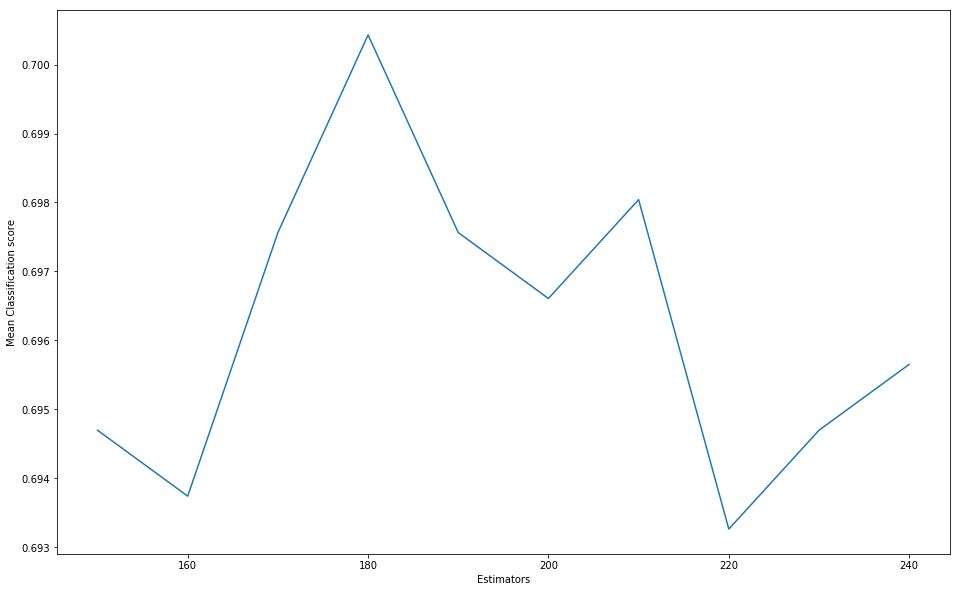

Optimal estimators for classifier =  180
Classification accuracy with optimal estimators 0.7004
Classification Accuracy with ideal estimators on training set = 1.0
Classification Accuracy with ideal estimators on validation set = 0.6963


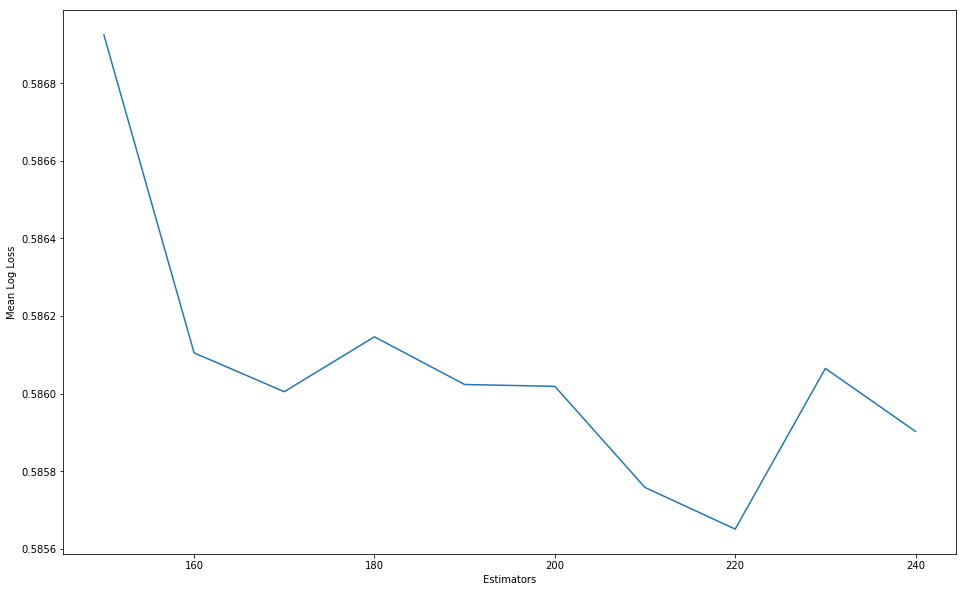

Optimal estimators for classifier =  220
Classification accuracy with optimal estimators 0.5869
Log Loss with ideal estimators on training set = 0.1705
Log Loss with ideal estimators on validation set = 0.5846


In [142]:
score_array=[[],[],[],[],[],[],[]]
score_arraylog=[[],[],[],[],[],[],[]]
count=0
split=cross.split(X_tr)
for i, j in split:
    x_train_new, x_val_new = X_tr[i], X_tr[j]
    y_train_new, y_val_new = y_tr[i], y_tr[j]
    for estimators in np.arange(150, 250, 10):
        rf=RandomForestClassifier(n_estimators = estimators, random_state=42).fit(X=x_train_new, y=y_train_new)
        score_array[count].append(rf.score(x_val_new, y_val_new))
        pred_proba = rf.predict_proba(x_val_new)
        this_logloss = log_loss(y_val_new, pred_proba)
        score_arraylog[count].append(this_logloss)
    count=count+1
    print("Iteration", count)
plt.figure(figsize=(16, 10))
plt.plot(np.arange(150,250,10), np.mean(score_array, axis=0))
plt.ylabel("Mean Classification score")
plt.xlabel("Estimators")
plt.show()
estimatorideal=np.arange(150,250,10)[np.mean(score_array, axis=0).argmax()]
print("Optimal estimators for classifier = ", estimatorideal)
print("Classification accuracy with optimal estimators", np.round(np.mean(score_array, axis=0)[np.mean(score_array, axis=0).argmax()], decimals=4))
rf_final=RandomForestClassifier(n_estimators = estimatorideal, random_state=42).fit(X=X_tr, y=y_tr)
print("Classification Accuracy with ideal estimators on training set =", np.round(rf_final.score(X_tr, y_tr), decimals=4))
print("Classification Accuracy with ideal estimators on validation set =", np.round(rf_final.score(X_val, y_val), decimals=4))
plt.figure(figsize=(16, 10))
plt.plot(np.arange(150,250,10), np.mean(score_arraylog, axis=0))
plt.ylabel("Mean Log Loss")
plt.xlabel("Estimators")
plt.show()
estimatorideal=np.arange(150,250,10)[np.mean(score_arraylog, axis=0).argmin()]
print("Optimal estimators for classifier = ", estimatorideal)
print("Classification accuracy with optimal estimators", np.round(np.mean(score_arraylog, axis=0)[np.mean(score_arraylog, axis=0).argmax()], decimals=4))
rf_final=RandomForestClassifier(n_estimators = estimatorideal, random_state=42).fit(X=X_tr, y=y_tr)
pred_proba=rf_final.predict_proba(X_tr)
this_logloss=log_loss(y_tr, pred_proba)
print("Log Loss with ideal estimators on training set =", np.round(this_logloss, decimals=4))
pred_proba = rf_final.predict_proba(X_val)
this_logloss = log_loss(y_val, pred_proba)
print("Log Loss with ideal estimators on validation set =", np.round(this_logloss, decimals=4))

Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Optimal value for regularisation parameter gamma (accuracy)=  0.00316227766017
Optimal value for regularisation parameter C (accuracy)=  1.46779926762
Classification Accuracy with ideal gamma on training set = 0.9943
Classification Accuracy with ideal gamma on validation set = 0.7233


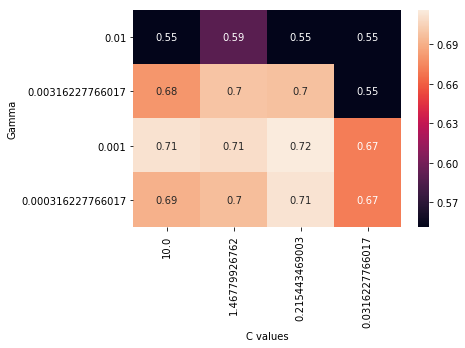

In [143]:
score_array_rbf_ultimate=[[[],[],[],[]],[[],[],[],[]],[[],[],[],[]],[[],[],[],[]],[[],[],[],[]],[[],[],[],[]],[[],[],[],[]]]
score_array_rbf_log=[[[],[],[],[]],[[],[],[],[]],[[],[],[],[]],[[],[],[],[]],[[],[],[],[]],[[],[],[],[]],[[],[],[],[]]]
count=0
gammacounter=0
split=cross.split(X_tr)
for i, j in split:
    x_train_new, x_val_new = X_tr[i], X_tr[j]
    y_train_new, y_val_new = y_tr[i], y_tr[j]
    for gammaval in np.logspace(-3.5, -2, 4):
        for para in np.logspace(-1.5,1,4):
            svc_rbf_ultimate = SVC(kernel='rbf', gamma=gammaval, C=para , probability=True)
            svc_rbf_ultimate.fit(x_train_new, y_train_new)
            score_array_rbf_ultimate[count][gammacounter].append(svc_rbf_ultimate.score(x_val_new, y_val_new))
            pred_proba = svc_rbf_ultimate.predict_proba(x_val_new)
            this_logloss = log_loss(y_val_new, pred_proba)
            score_array_rbf_log[count][gammacounter].append(this_logloss)
            gammacounter=gammacounter+1
        gammacounter=0
    count=count+1
    print("Iteration", count)
mean_scores=[[],[],[],[]]
mean_logscores=[[],[],[],[]]
for i in range(4):
    for j in range(4):
        mean_scores[i].append((score_array_rbf_ultimate[0][i][j]+score_array_rbf_ultimate[1][i][j]+score_array_rbf_ultimate[2][i][j]+score_array_rbf_ultimate[3][i][j]+score_array_rbf_ultimate[4][i][j]+score_array_rbf_ultimate[5][i][j]+score_array_rbf_ultimate[6][i][j])/7)
ax=sns.heatmap(mean_scores, xticklabels=np.logspace(-1.5,1,4)[::-1], yticklabels=np.logspace(-3.5, -2,4)[::-1] ,annot=True)
ax.set_xlabel('C values')
ax.set_ylabel('Gamma')
count=0
optimumvalues=np.unravel_index(np.asarray(mean_scores).argmax(), np.asarray(mean_scores).shape)
optimumC=np.logspace(-1.5,1,4)[optimumvalues[0]]
optimumgamma=np.logspace(-3.5,-2,4)[optimumvalues[1]]
print("Optimal value for regularisation parameter gamma (accuracy)= ", optimumgamma)
print("Optimal value for regularisation parameter C (accuracy)= ", optimumC)
svc_rbf_pair=SVC(kernel='rbf', gamma=optimumgamma, C=optimumC, probability=True)
svc_rbf_pair.fit(X_tr, y_tr)
print("Classification Accuracy with ideal gamma on training set =", np.round(svc_rbf_pair.score(X_tr, y_tr), decimals=4))
print("Classification Accuracy with ideal gamma on validation set =", np.round(svc_rbf_pair.score(X_val, y_val), decimals=4))
for i in range(4):
    for j in range(4):
        mean_logscores[i].append((score_array_rbf_log[0][i][j]+score_array_rbf_log[1][i][j]+score_array_rbf_log[2][i][j]+score_array_rbf_log[3][i][j]+score_array_rbf_log[4][i][j]+score_array_rbf_log[5][i][j]+score_array_rbf_log[6][i][j])/7)

Optimal value for regularisation parameter gamma (logloss)=  0.001
Optimal value for regularisation parameter C = (logloss) 1.46779926762
Log Loss with ideal gamma on training set = 0.3606
Log Loss with ideal gamma on validation set = 0.5495


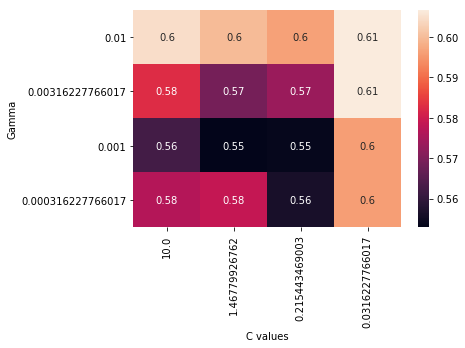

In [144]:
ax1=sns.heatmap(mean_logscores, xticklabels=np.logspace(-1.5,1,4)[::-1], yticklabels=np.logspace(-3.5, -2,4)[::-1] ,annot=True)
ax1.set_xlabel('C values')
ax1.set_ylabel('Gamma')
count=0
optimumvalues=np.unravel_index(np.asarray(mean_logscores).argmin(), np.asarray(mean_logscores).shape)
optimumC=np.logspace(-1.5,1,4)[optimumvalues[0]]
optimumgamma=np.logspace(-3.5,-2,4)[optimumvalues[1]]
print("Optimal value for regularisation parameter gamma (logloss)= ", optimumgamma)
print("Optimal value for regularisation parameter C = (logloss)", optimumC)
svc_rbf_pair=SVC(kernel='rbf', gamma=optimumgamma, C=optimumC, probability=True)
svc_rbf_pair.fit(X_tr, y_tr)
pred_proba = svc_rbf_pair.predict_proba(X_tr)
this_logloss = log_loss(y_tr, pred_proba)
print("Log Loss with ideal gamma on training set =", np.round(this_logloss, decimals=4))
pred_proba = svc_rbf_pair.predict_proba(X_val)
this_logloss = log_loss(y_val, pred_proba)
print("Log Loss with ideal gamma on validation set =", np.round(this_logloss, decimals=4))

Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7


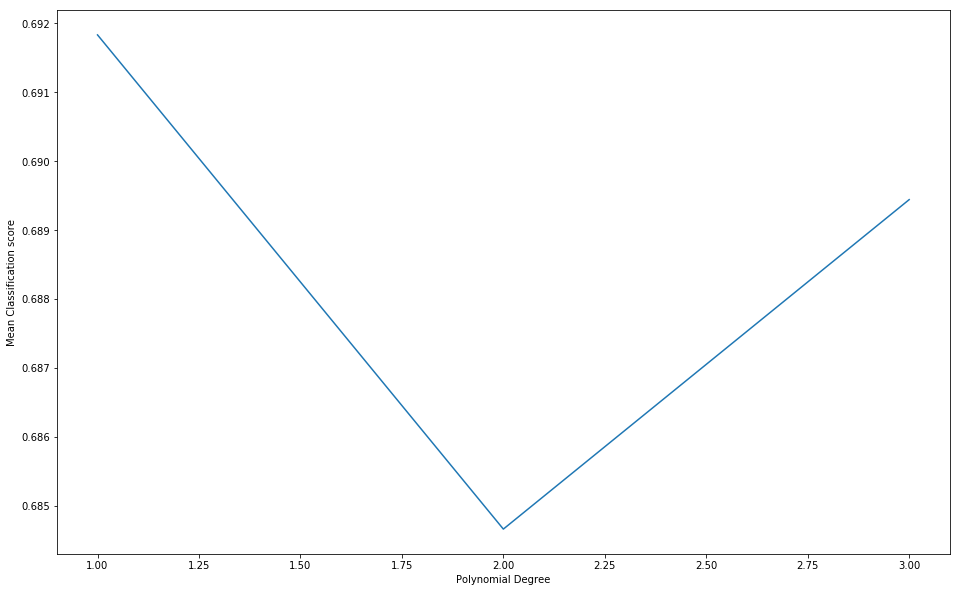

Optimal value for parameter degree(accuracy) =  1
Classification accuracy at optimal Degree value(accuracy) 0.6918
Classification Accuracy with ideal degree on training set = 0.7836
Classification Accuracy with ideal degree on validation set = 0.6891


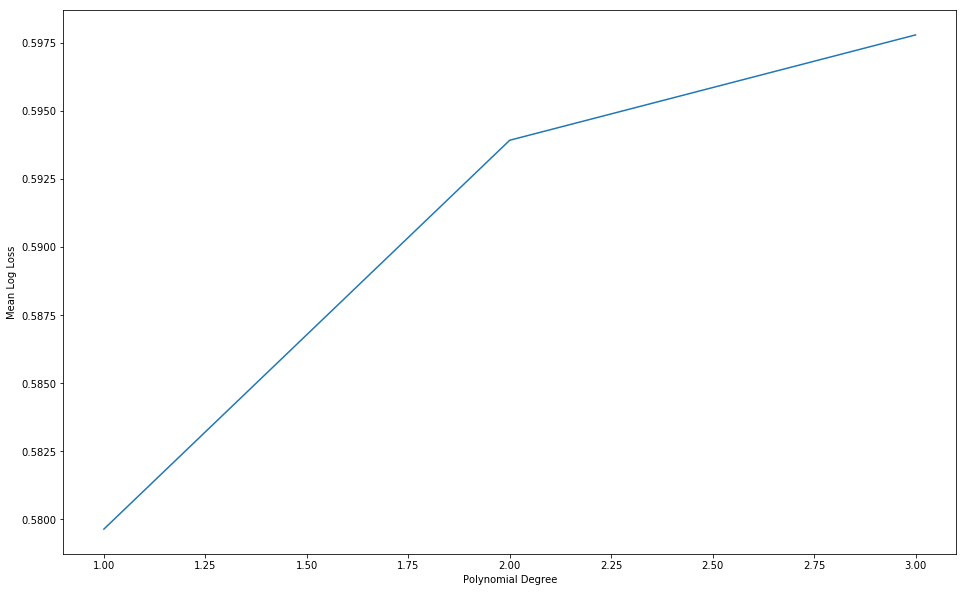

Optimal value for parameter degree(log loss) =  1
Log Loss at optimal Degree value 0.6847
Log Loss with ideal degree on training set = 0.485
Log Loss with ideal degree on validation set = 0.5883


In [145]:
score_array_poly=[[],[],[],[],[],[],[]]
score_array_polylog=[[],[],[],[],[],[],[]]
count=0
split=cross.split(X_tr)
for i, j in split:
    x_train_new, x_val_new = X_tr[i], X_tr[j]
    y_train_new, y_val_new = y_tr[i], y_tr[j]
    for degreeval in np.arange(1,4):
        svc_rbf_poly = SVC(kernel='poly', degree=degreeval, probability=True )
        svc_rbf_poly.fit(x_train_new, y_train_new)
        score_array_poly[count].append(svc_rbf_poly.score(x_val_new, y_val_new))
        pred_proba = svc_rbf_poly.predict_proba(x_val_new)
        this_logloss = log_loss(y_val_new, pred_proba)
        score_array_polylog[count].append(this_logloss)
    count=count+1
    print("Iteration", count)
plt.figure(figsize=(16, 10))
plt.plot(np.arange(1,4), np.mean(score_array_poly, axis=0))
plt.ylabel("Mean Classification score")
plt.xlabel("Polynomial Degree")
plt.show()
degreeideal=np.arange(1,4)[np.mean(score_array_poly, axis=0).argmax()]
print("Optimal value for parameter degree(accuracy) = ", degreeideal)
print("Classification accuracy at optimal Degree value(accuracy)", np.round(np.mean(score_array_poly, axis=0)[np.mean(score_array_poly, axis=0).argmax()], decimals=4))
svc_rbf_poly_final = SVC(kernel='poly', degree=degreeideal, probability=True )
svc_rbf_poly_final.fit(X_tr, y_tr)
print("Classification Accuracy with ideal degree on training set =", np.round(svc_rbf_poly_final.score(X_tr, y_tr), decimals=4))
print("Classification Accuracy with ideal degree on validation set =", np.round(svc_rbf_poly_final.score(X_val, y_val), decimals=4))
plt.figure(figsize=(16, 10))
plt.plot(np.arange(1,4), np.mean(score_array_polylog, axis=0))
plt.ylabel("Mean Log Loss")
plt.xlabel("Polynomial Degree")
plt.show()
degreeideal=np.arange(1,3)[np.mean(score_array_polylog, axis=0).argmin()]
print("Optimal value for parameter degree(log loss) = ", degreeideal)
print("Log Loss at optimal Degree value", np.round(np.mean(score_array_poly, axis=0)[np.mean(score_array_poly, axis=0).argmin()], decimals=4))
svc_rbf_poly_final = SVC(kernel='poly', degree=degreeideal, probability=True )
svc_rbf_poly_final.fit(X_tr, y_tr)
pred_proba=svc_rbf_poly_final.predict_proba(X_tr)
this_logloss=log_loss(y_tr, pred_proba)
print("Log Loss with ideal degree on training set =", np.round(this_logloss, decimals=4))
pred_proba = svc_rbf_poly_final.predict_proba(X_val)
this_logloss = log_loss(y_val, pred_proba)
print("Log Loss with ideal degree on validation set =", np.round(this_logloss, decimals=4))

In [146]:
for i in range(1,4):
    for j in range(1,4):
        for k in range(1,4):
            print("Weights: Random Forest("+str(i)+")   SVC RBF("+str(j)+")   SVC Poly("+str(k)+")")
            eclf1 = VotingClassifier(estimators=[('rf', rf_final), ('rbf', svc_rbf_pair), ('poly', svc_rbf_poly_final)], voting='soft', weights=[i,j,k])
            eclf1 = eclf1.fit(X_tr, y_tr)
            pred_proba = eclf1.predict_proba(X_tr)
            this_logloss = log_loss(y_tr, pred_proba)
            print("Classification accuracy on training data " , np.round(eclf1.score(X_tr, y_tr), decimals=4))
            print("Log Loss on training data " , np.round(this_logloss, decimals=4))
            pred_proba = eclf1.predict_proba(X_val)
            this_logloss = log_loss(y_val, pred_proba)
            print("Classification accuracy on validation data " , np.round(eclf1.score(X_val, y_val), decimals=4))
            print("Log Loss on validation data " , np.round(this_logloss, decimals=4))

Weights: Random Forest(1)   SVC RBF(1)   SVC Poly(1)
Classification accuracy on training data  0.9345
Log Loss on training data  0.3224
Classification accuracy on validation data  0.7161
Log Loss on validation data  0.5608
Weights: Random Forest(1)   SVC RBF(1)   SVC Poly(2)
Classification accuracy on training data  0.8963
Log Loss on training data  0.3609
Classification accuracy on validation data  0.7098
Log Loss on validation data  0.5654
Weights: Random Forest(1)   SVC RBF(1)   SVC Poly(3)
Classification accuracy on training data  0.8767
Log Loss on training data  0.3798
Classification accuracy on validation data  0.7044
Log Loss on validation data  0.5677
Weights: Random Forest(1)   SVC RBF(2)   SVC Poly(1)
Classification accuracy on training data  0.9111
Log Loss on training data  0.3304
Classification accuracy on validation data  0.7206
Log Loss on validation data  0.5559
Weights: Random Forest(1)   SVC RBF(2)   SVC Poly(2)
Classification accuracy on training data  0.8872
Log Lo

In [147]:
svc_rbf_pair=SVC(kernel='rbf', gamma=0.004, C=1.9, probability=True)
svc_rbf_pair.fit(X_tr, y_tr)
print("Classification Accuracy with ideal gamma and C on training set =", np.round(svc_rbf_pair.score(X_tr, y_tr), decimals=4))
print("Classification Accuracy with ideal gamma and C on validation set =", np.round(svc_rbf_pair.score(X_val, y_val), decimals=4))
pred_proba = svc_rbf_pair.predict_proba(X_tr)
this_logloss = log_loss(y_tr, pred_proba)
print("Log Loss with ideal gamma and C on training set =", np.round(this_logloss, decimals=4))
pred_proba = svc_rbf_pair.predict_proba(X_val)
this_logloss = log_loss(y_val, pred_proba)
print("Log Loss with ideal gamma and C on validation set =", np.round(this_logloss, decimals=4))

Classification Accuracy with ideal gamma and C on training set = 1.0
Classification Accuracy with ideal gamma and C on validation set = 0.7314
Log Loss with ideal gamma and C on training set = 0.0752
Log Loss with ideal gamma and C on validation set = 0.5385


In [148]:
X_test=test_B[atrib_list].values
X_test=scaler.transform(X_test)
pred_proba=svc_rbf_pair.predict_proba(X_test)
pred_proba.shape

(1114, 2)

In [149]:
# Execute this cell to export your results
from numpy import savetxt
def save_predictions(pred_proba):
    if pred_proba.shape != (1114,2):
        raise ValueError('Predicted probabilities array is not the right shape.')
    
    savetxt('assignment_3_predictions.txt', pred_proba)

# You need to replace "test_images_partB_pred_proba"
# with the name of the array which contains the probability 
# estimates for the data in the test set.
save_predictions(pred_proba) 

# Appendix

## More information about visual words

Visual words are based on [Scale-invariant feature transforms (SIFT)](https://en.wikipedia.org/wiki/Scale-invariant_feature_transform). SIFT features are essentially local orientation histograms and capture the properties of small image regions. They possess attractive invariance properties which make them well suited for our task (you can read more about SIFT features in [D.Lowe, IJCV 60(2):91- 110, 2004](http://link.springer.com/article/10.1023/B:VISI.0000029664.99615.94), but the details don't matter for the purpose of this assignment). Each SIFT feature is a 128 dimensional vector. From each image many SIFT features are extracted, typically > 2500 per image (features are extracted at regular intervals using a 15 pixel grid and at 4 different scales). To obtain visual words a representative subset of all extracted SIFT features from all images is chosen and clustered with k-means using 500 centres (such use of the k-means algorithm will be discussed in detail during the lecture). These 500 cluster centres form our visual words. The representation of a single image is obtained by first assigning each SIFT feature extracted from the image to the appropriate cluster (i.e. we determine the visual word corresponding to each feature by picking the closest cluster centre). We then count the number of features from that image assigned to each cluster (i.e. we determine how often each visual word is present in the image). This results in a 500 dimensional count vector for each image (one dimension for each visual word). The normalized version of this count vector gives the final representation of the image (normalized means that we divide the count vector by the total number of visual words in the image, i.e. the normalized counts sum to 1 for each image)